In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set pandas options to diaply all columns and rows in data frame

pd.set_option('display.max_rows',260)
pd.set_option('display.max_column',100)

In [3]:
# Load the data into dataframe

house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Review data frame size

house.shape

(1460, 81)

In [5]:
# Review data types of the columns loaded.
# All columns are with correct data type

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Values

In [6]:
# Check for missing value columns

na_df = house.isna().sum().reset_index().sort_values(0, ascending=False)
na_df.columns=['index','na_count']
na_df['per'] = np.round(na_df['na_count']/house.shape[0]*100,2)

In [7]:
# Dislay all the columns with missing values

na_df[na_df['na_count']>0]

,index,na_count,per
72,PoolQC,1453,99.52
74,MiscFeature,1406,96.30
6,Alley,1369,93.77
73,Fence,1179,80.75
57,FireplaceQu,690,47.26
3,LotFrontage,259,17.74
59,GarageYrBlt,81,5.55
64,GarageCond,81,5.55
58,GarageType,81,5.55
60,GarageFinish,81,5.55


In [8]:
house.shape

(1460, 81)

In [9]:
# there are 81 rows with GarageYrBlt missing. Drop these rows

house = house[~house['GarageYrBlt'].isnull()]
house.shape

(1379, 81)

In [10]:
# there are 8 rows with MasVnrArea missing. Drop these rows

house = house[~house['MasVnrArea'].isnull()]
house.shape

(1371, 81)

In [11]:
# there is 1 row with Electrical missing. Drop this row

house = house[~house['Electrical'].isnull()]
house.shape

(1370, 81)

In [12]:
# Check agian for missing values

house.isnull().sum().reset_index().sort_values(0, ascending=False).head(12)

,index,0
72,PoolQC,1363
74,MiscFeature,1319
6,Alley,1289
73,Fence,1105
57,FireplaceQu,613
3,LotFrontage,250
32,BsmtExposure,31
35,BsmtFinType2,31
30,BsmtQual,30
31,BsmtCond,30


In [13]:
# Identify coulmns with null values which have meaning and replace the null values with a new category,None

col_NA_None = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','BsmtExposure','BsmtFinType2','BsmtFinType1',
               'BsmtQual','BsmtCond']

In [14]:
for col in col_NA_None:
    house[col].fillna('None', inplace=True)

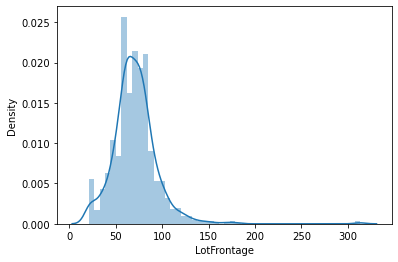

(2.250480184113769, 18.426522626755933)

In [15]:
# LotFrontage column has 259 rows with missing value.
# Impue missing values with median and verify the distribution is not changed before and after

sns.distplot(house['LotFrontage'], bins=50)
plt.show()
house['LotFrontage'].skew(),house['LotFrontage'].kurt()

In [16]:
house['LotFrontage'].describe()

count    1120.000000
mean       70.663393
std        24.277552
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace=True)

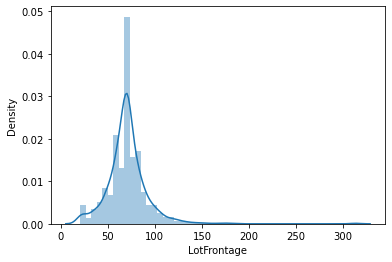

(2.504454848522524, 23.239195417300948)

In [18]:
# Imputed Distribution is almost same with slight change in median, mean, skew and kurtosis

sns.distplot(house['LotFrontage'], bins=50)
plt.show()
house['LotFrontage'].skew(),house['LotFrontage'].kurt()

In [19]:
house['LotFrontage'].describe()

count    1370.000000
mean       70.542336
std        21.950673
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
# Verify for any remaining null values
# No Missing values remaining

house.isnull().sum().reset_index().sort_values(0, ascending=False).head(5)

,index,0
0,Id,0
41,CentralAir,0
59,GarageYrBlt,0
58,GarageType,0
57,FireplaceQu,0


In [21]:
# Drop ID column as it is not generic feature for model

house.drop(columns=['Id'], inplace=True)

In [22]:
house.shape

(1370, 80)

In [23]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,56.054745,70.542336,10687.435036,6.181752,5.582482,1972.783942,1985.327007,109.076642,454.211679,48.418248,570.742336,1073.372263,1176.086131,353.202190,4.162044,1533.450365,0.429197,0.059124,1.577372,0.394161,2.865693,1.037956,6.551825,0.641606,1978.353285,1.869343,500.462774,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,6.331387,2007.811679,185194.797080
std,41.073531,21.950673,10228.507006,1.344236,1.081480,29.371056,20.452934,184.589326,458.985739,164.817484,444.050989,435.558797,385.381717,439.497524,40.260837,519.489200,0.513963,0.239019,0.547455,0.502116,0.782985,0.194944,1.590884,0.644711,24.685798,0.631307,185.988074,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,2.693166,1.331589,78899.705642
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7731.000000,5.000000,5.000000,1955.000000,1967.250000,0.000000,0.000000,0.000000,225.500000,808.500000,894.000000,0.000000,0.000000,1152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133925.000000
50%,50.000000,70.000000,9591.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,399.500000,0.000000,477.500000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,2001.000000,2004.000000,171.750000,728.000000,0.000000,811.000000,1314.000000,1414.000000,737.000000,0.000000,1788.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,582.750000,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217875.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
# Identify categorical columns in data set

cat_cols = house.columns[house.dtypes == 'object']

In [25]:
for col in cat_cols:
    print(house[col].value_counts())
    print("=============================")

RL         1095
RM          193
FV           62
RH           12
C (all)       8
Name: MSZoning, dtype: int64
Pave    1365
Grvl       5
Name: Street, dtype: int64
None    1289
Grvl      43
Pave      38
Name: Alley, dtype: int64
Reg    854
IR1    465
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1235
Bnk      54
HLS      48
Low      33
Name: LandContour, dtype: int64
AllPub    1369
NoSeWa       1
Name: Utilities, dtype: int64
Inside     981
Corner     249
CulDSac     92
FR2         44
FR3          4
Name: LotConfig, dtype: int64
Gtl    1297
Mod      61
Sev      12
Name: LandSlope, dtype: int64
NAmes      219
CollgCr    147
OldTown    101
Somerst     83
Edwards     78
Gilbert     78
NridgHt     76
NWAmes      73
Sawyer      71
SawyerW     57
Crawfor     50
BrkSide     48
Mitchel     44
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighbor

### EDA

- Univariate

In [26]:
# Identify continuous variable columns in data set

Numeric_cols = house.columns[house.dtypes != 'object']

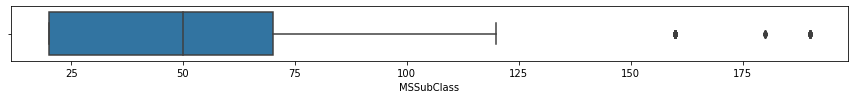

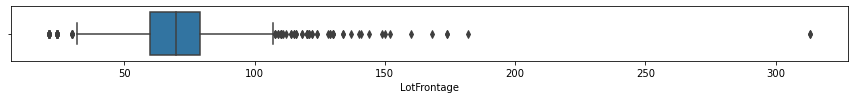

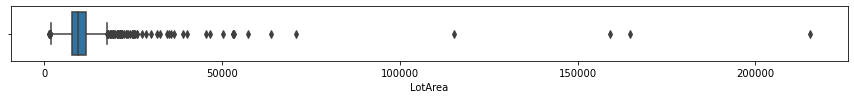

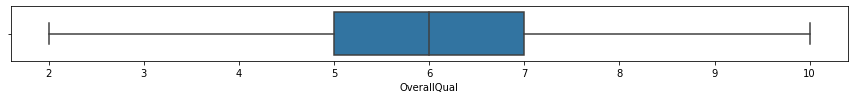

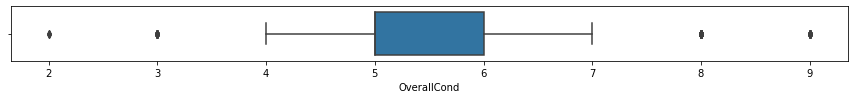

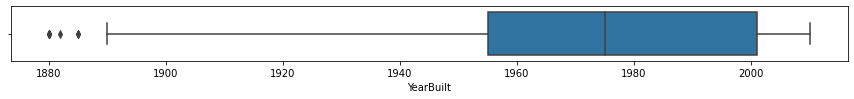

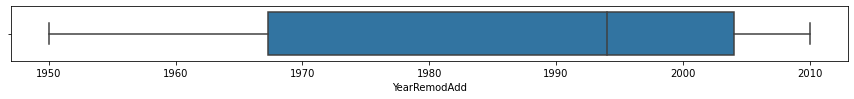

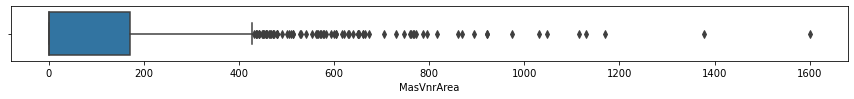

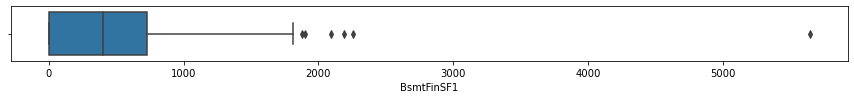

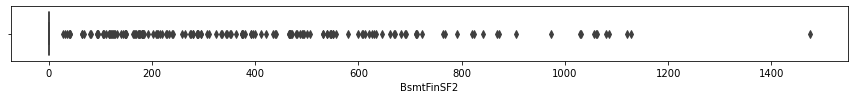

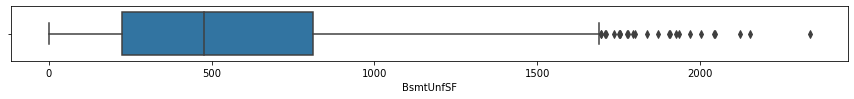

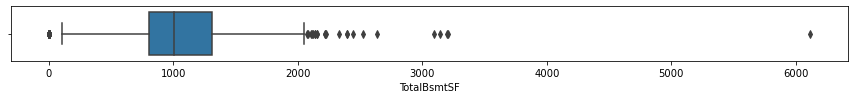

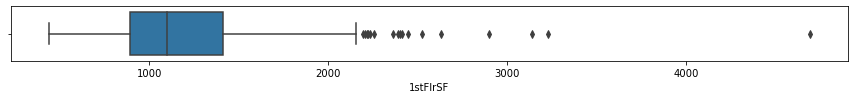

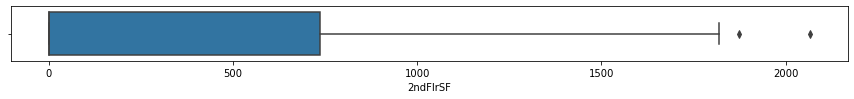

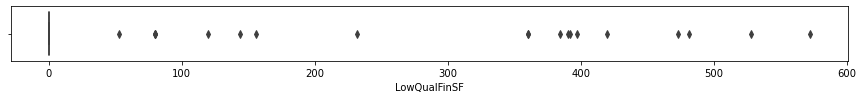

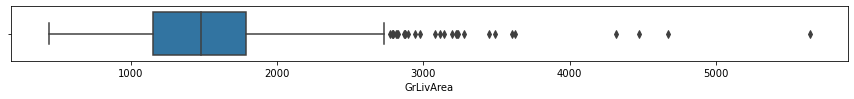

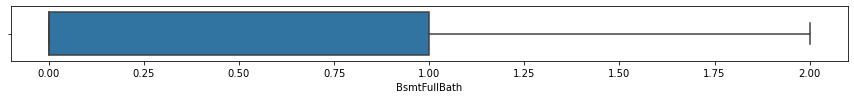

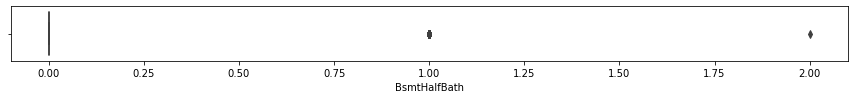

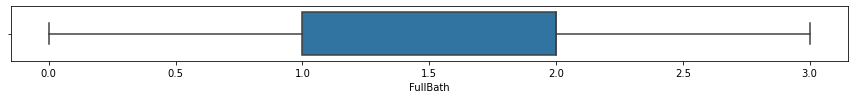

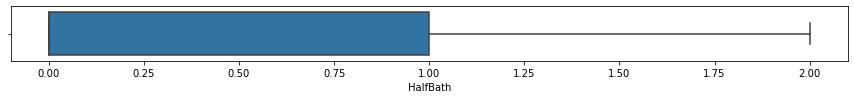

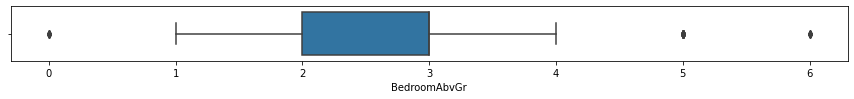

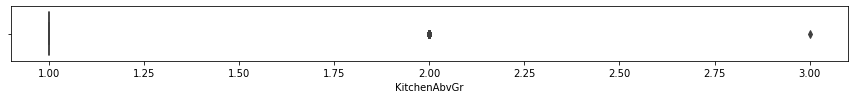

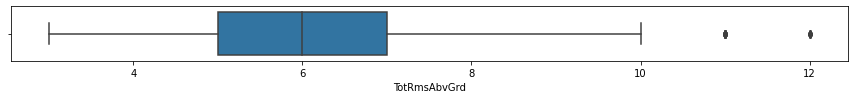

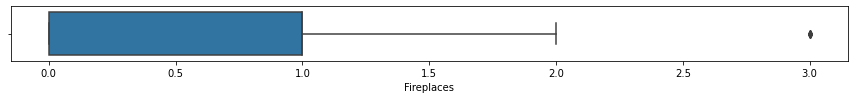

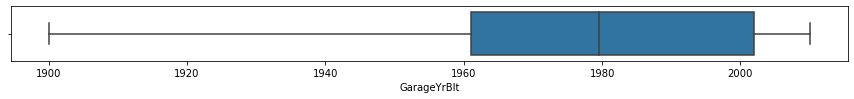

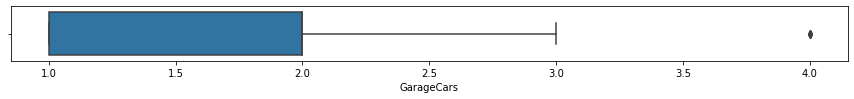

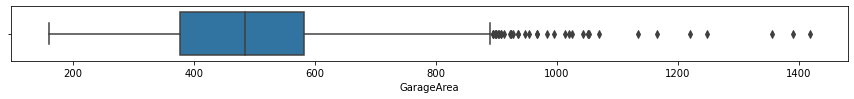

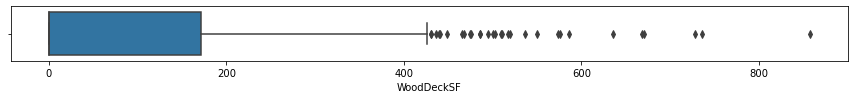

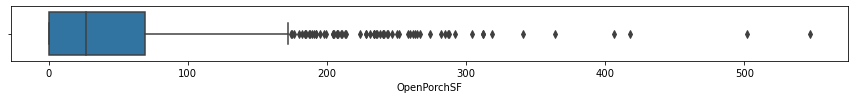

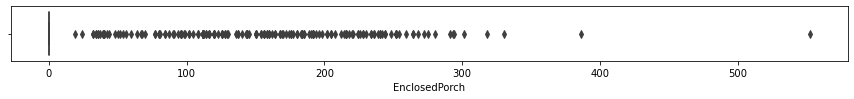

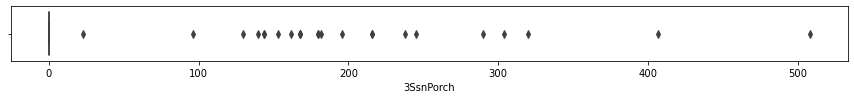

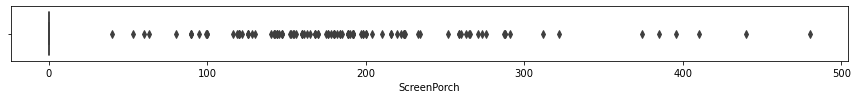

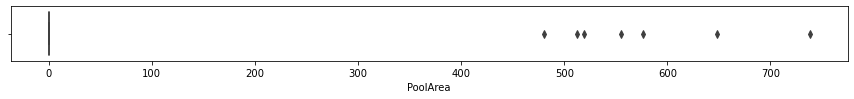

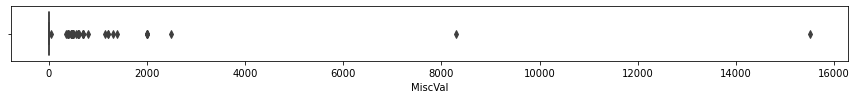

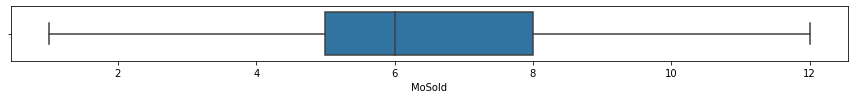

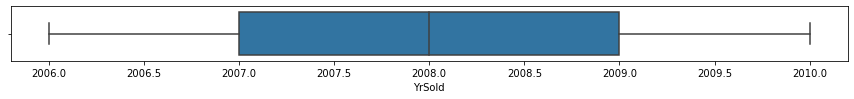

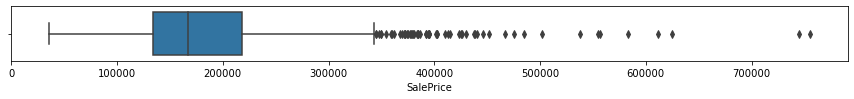

In [27]:
# Plot boxplots of all continous/neumerical variables

for col in Numeric_cols:
    plt.figure(figsize=(15,1))
    sns.boxplot(house[col])
    plt.show()

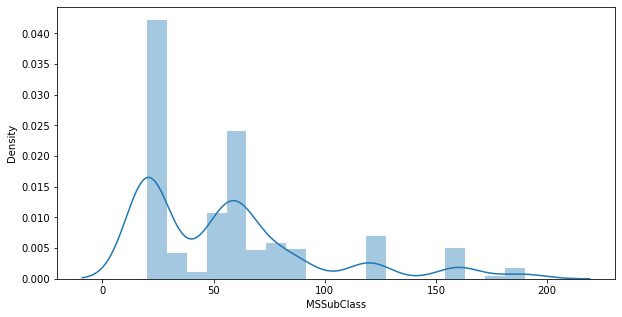

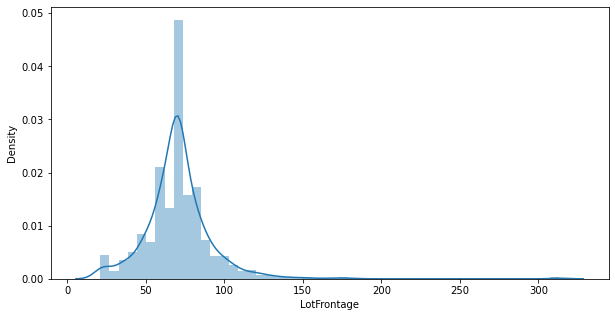

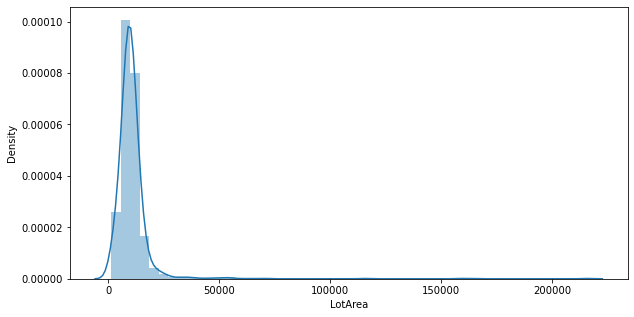

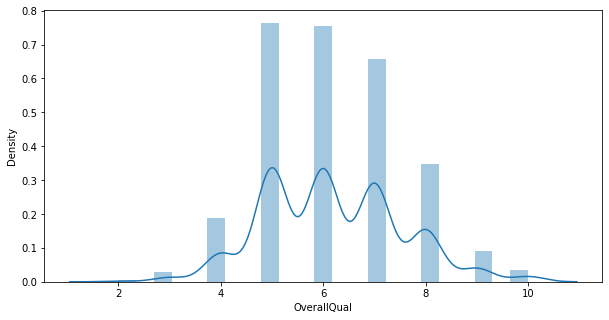

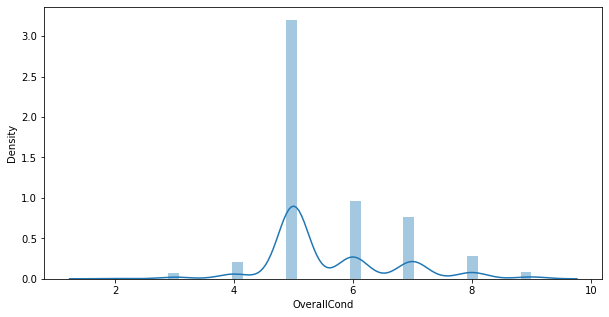

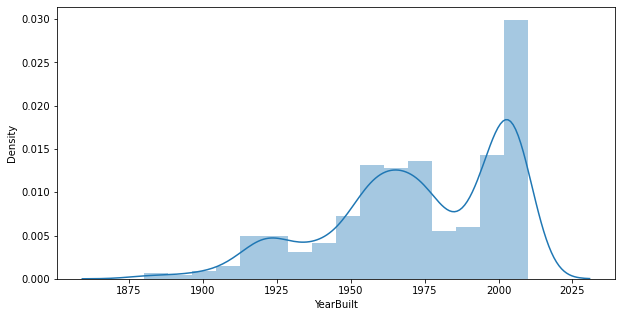

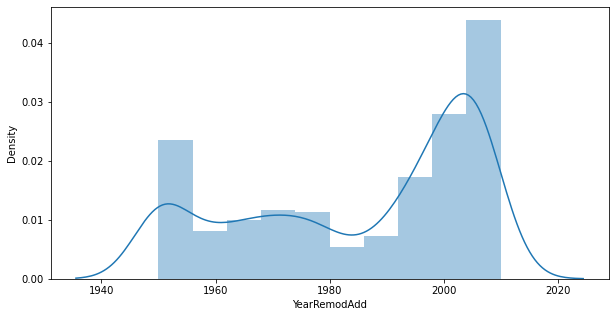

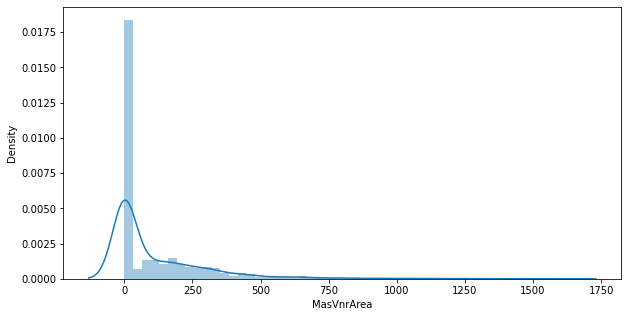

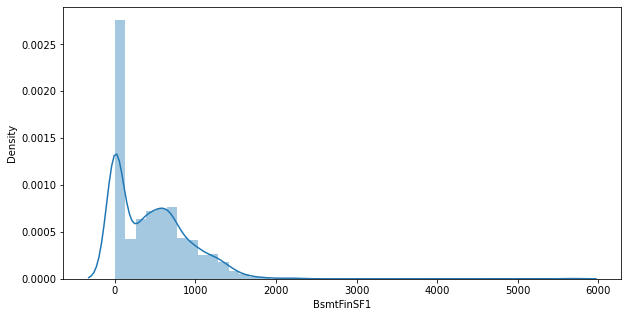

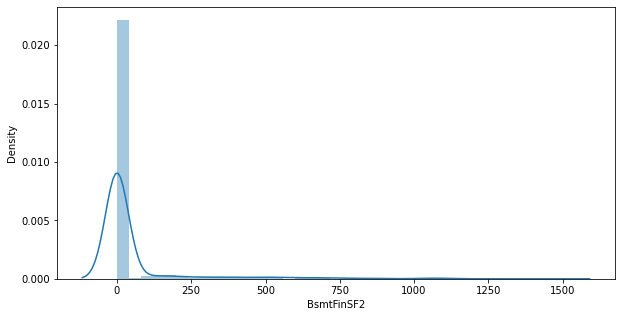

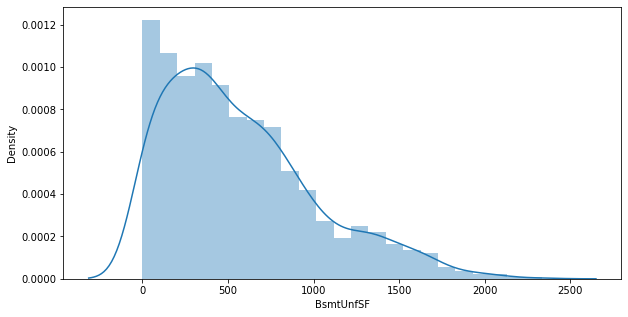

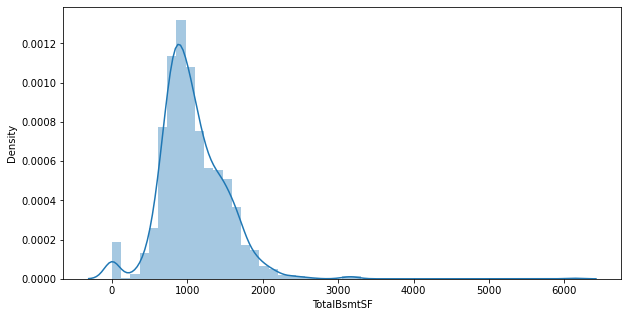

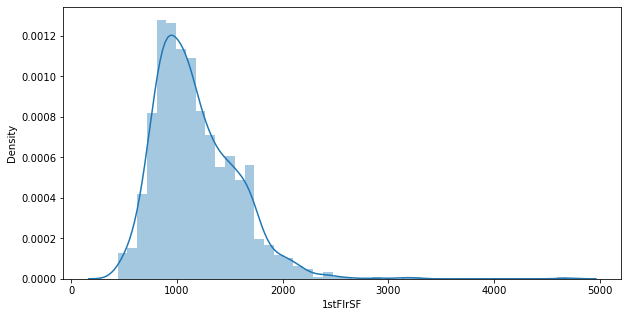

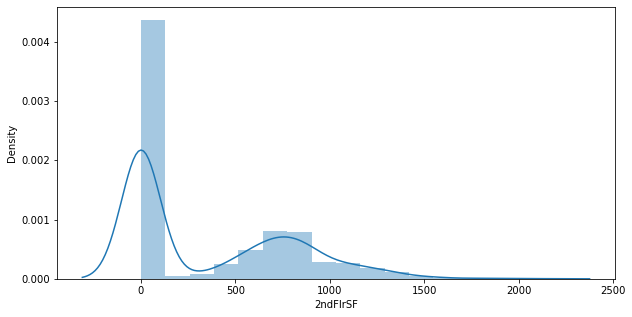

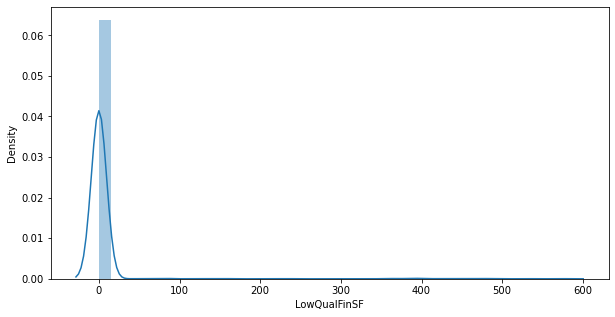

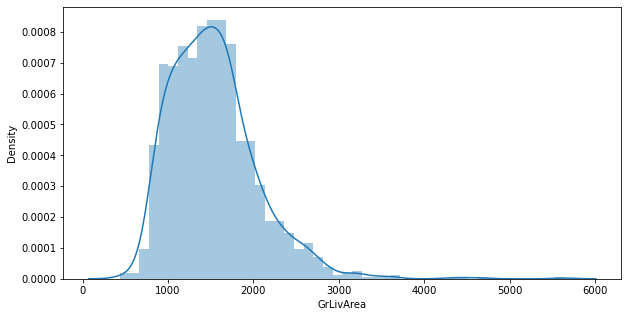

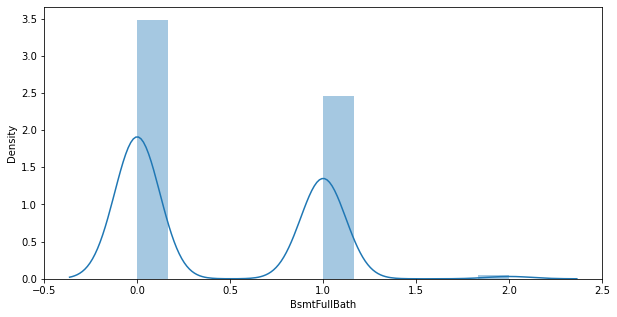

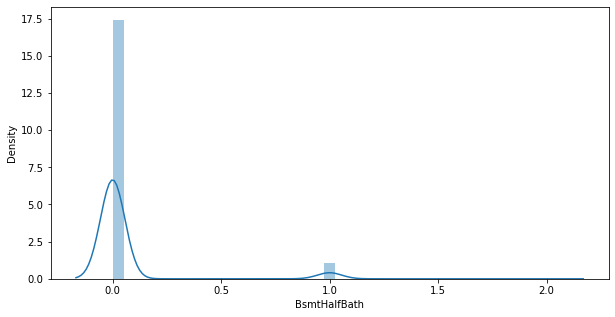

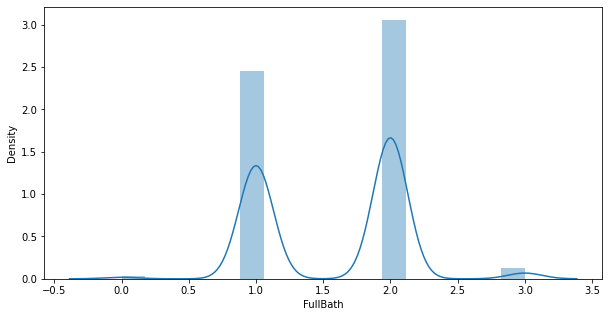

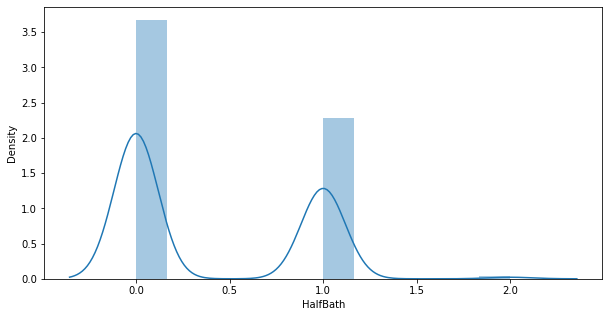

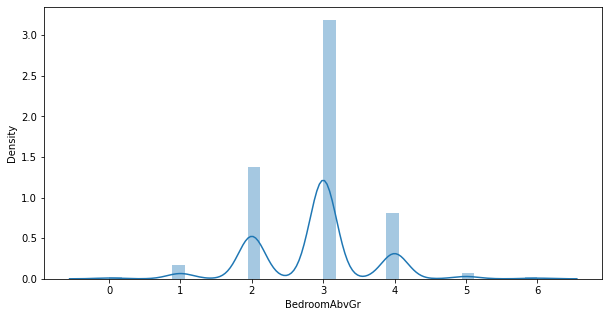

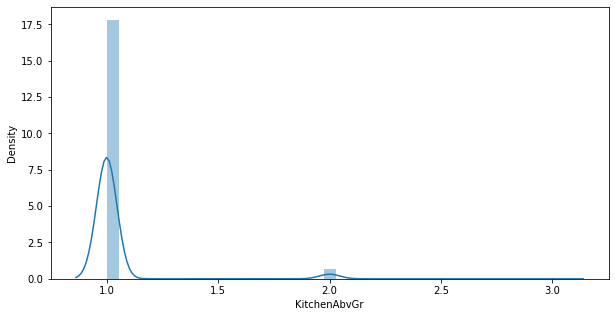

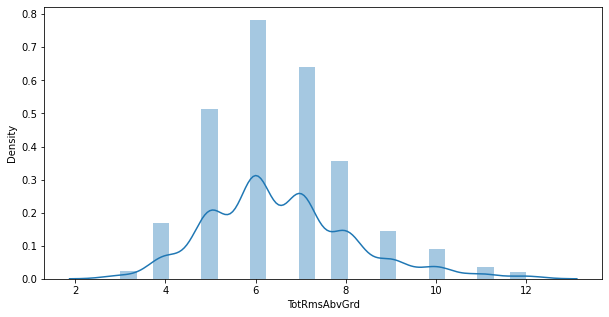

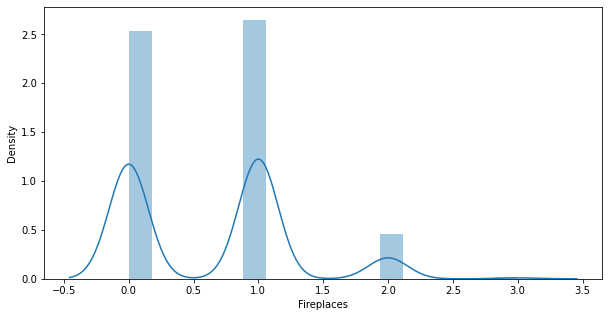

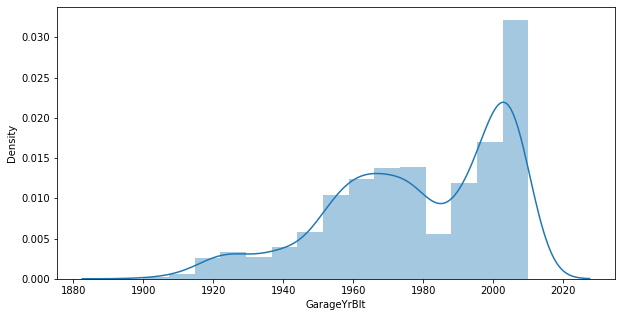

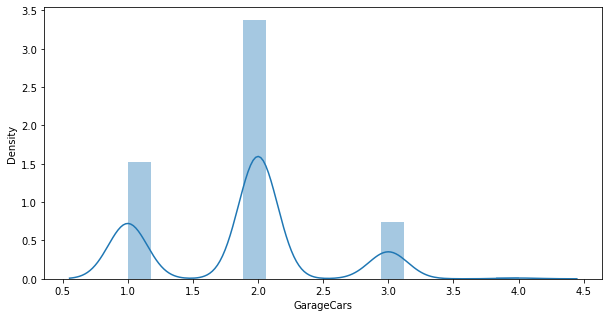

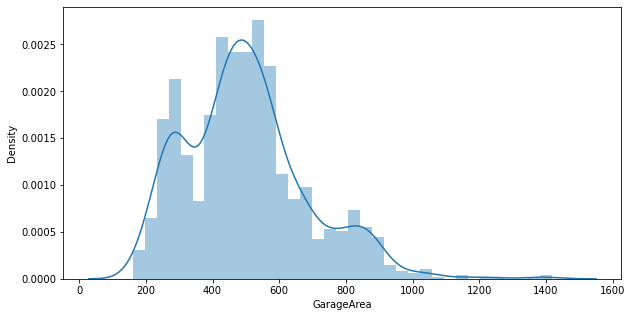

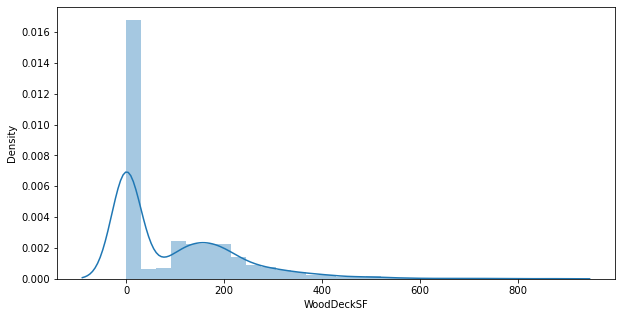

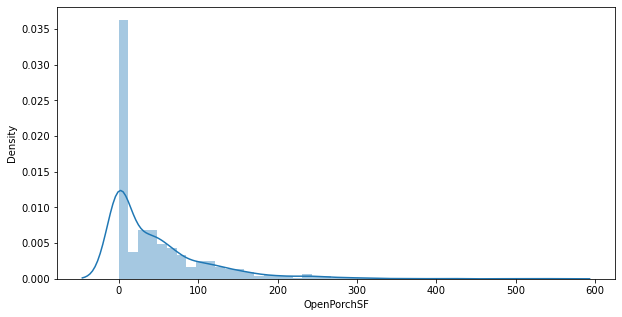

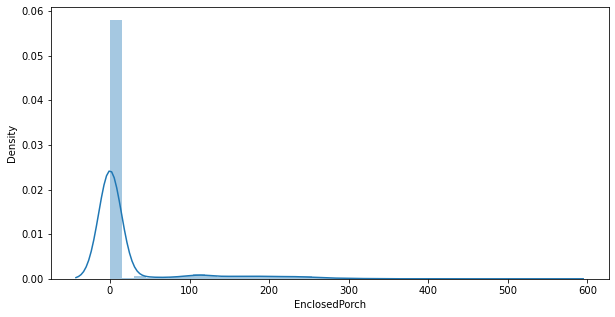

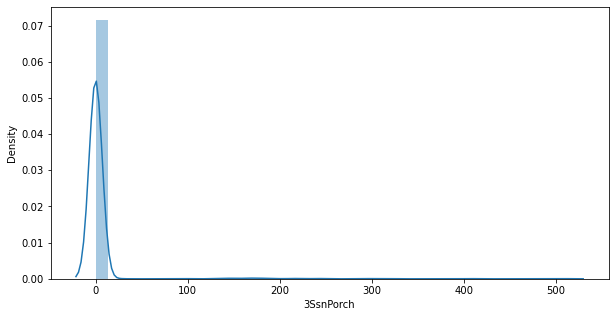

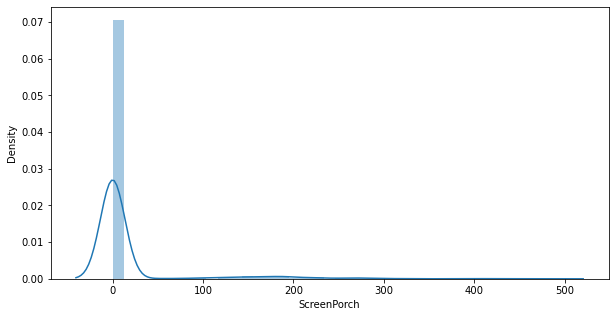

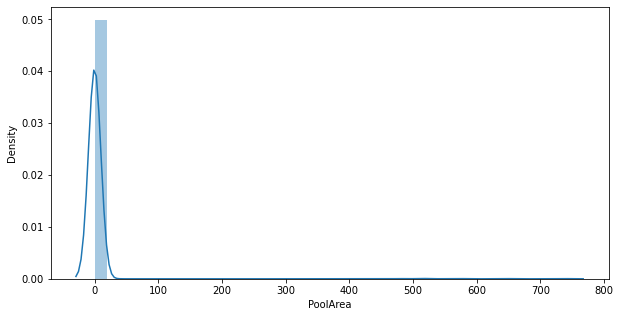

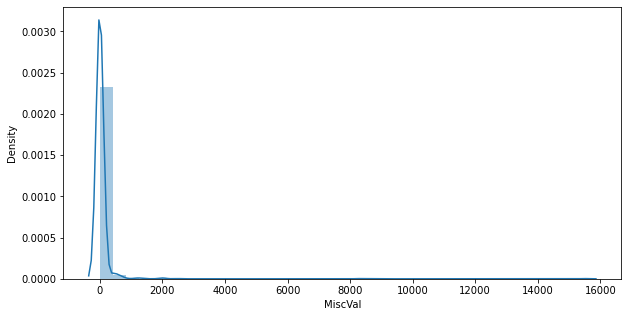

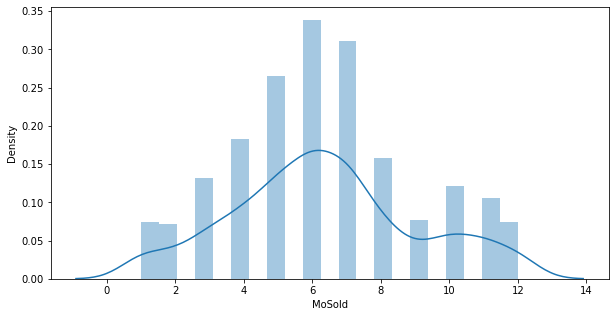

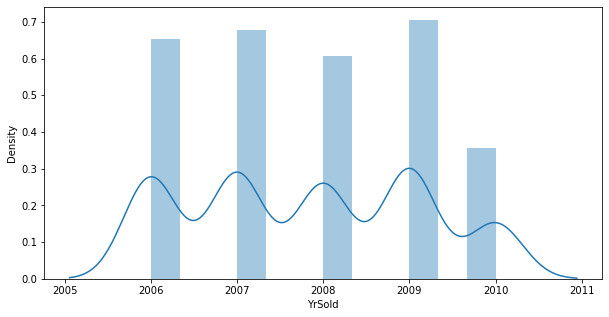

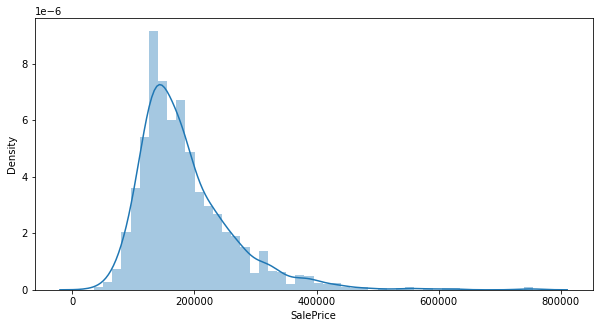

In [28]:
# Plot histograms of all continous/neumerical variables

for col in Numeric_cols:
    plt.figure(figsize=(10,5))
    sns.distplot(house[col])
    plt.show()

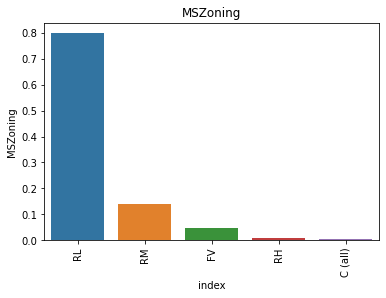

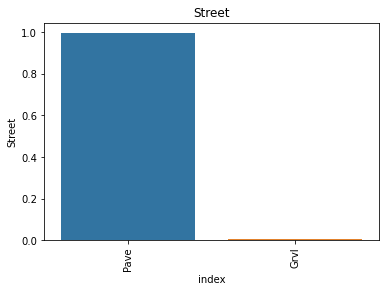

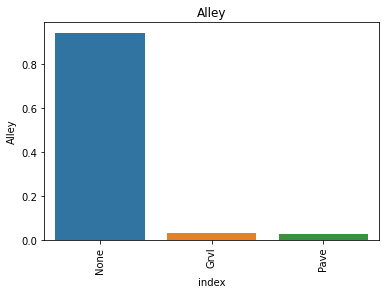

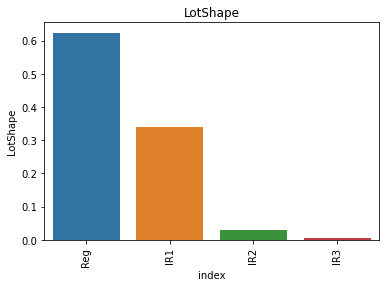

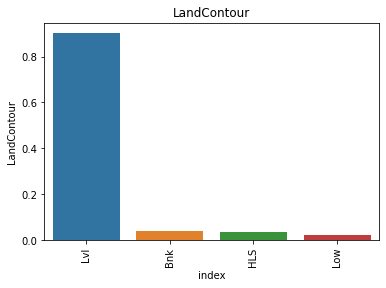

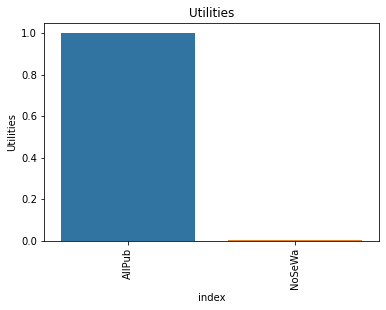

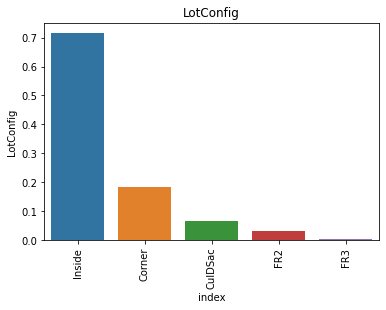

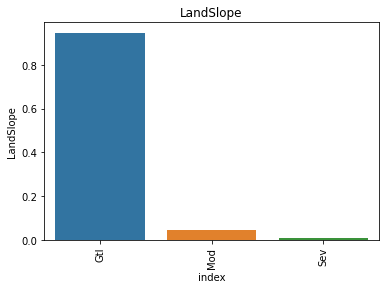

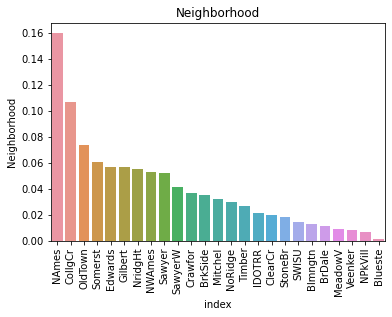

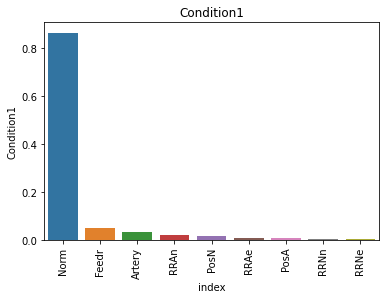

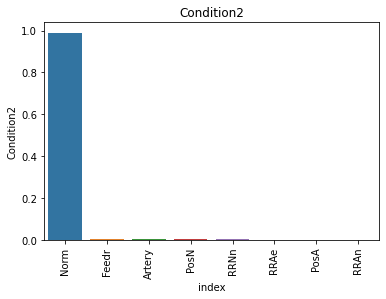

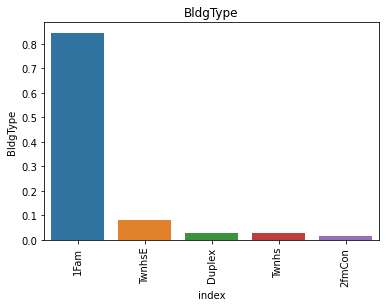

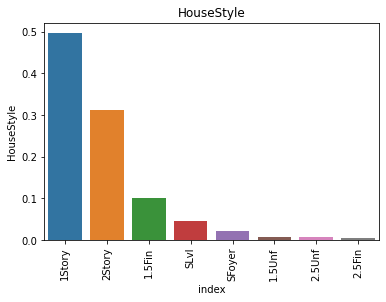

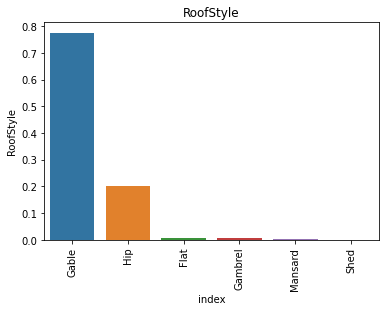

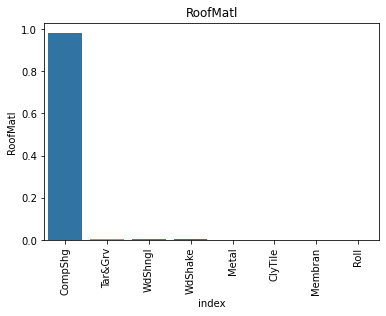

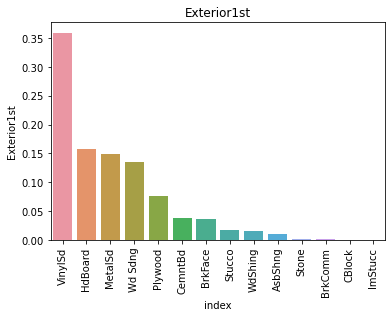

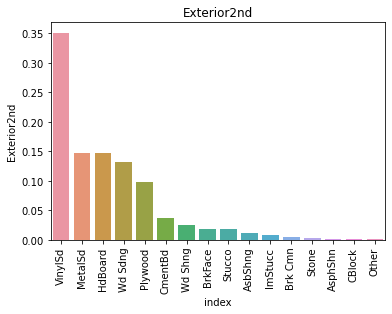

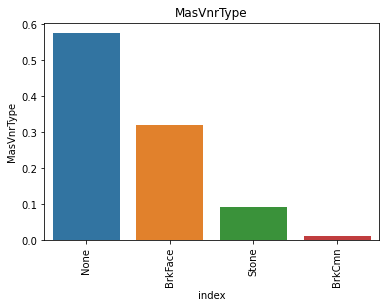

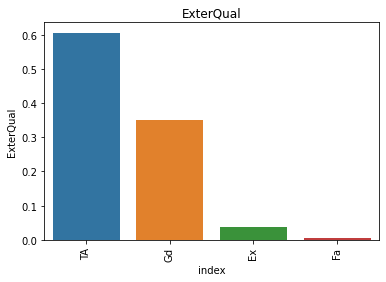

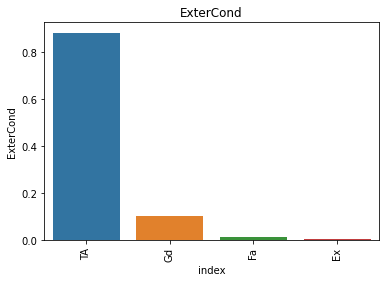

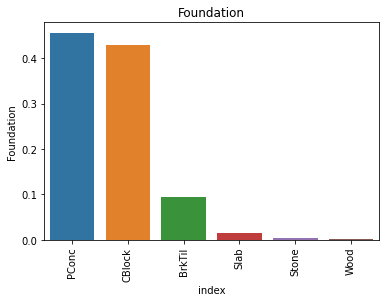

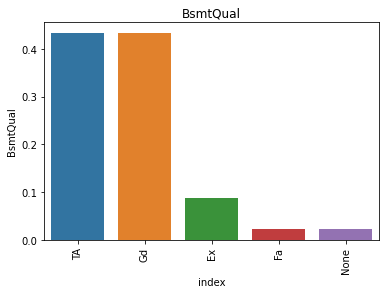

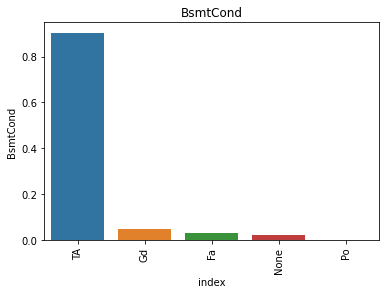

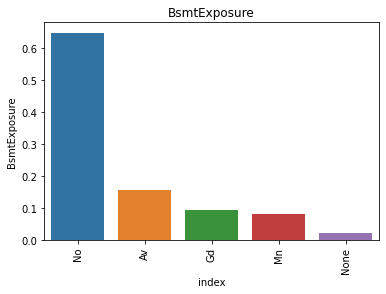

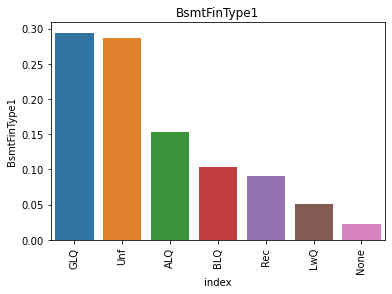

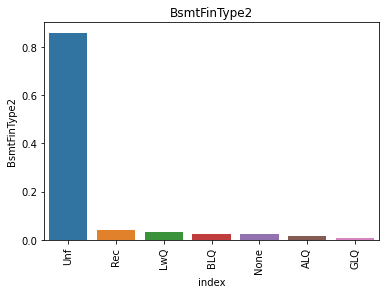

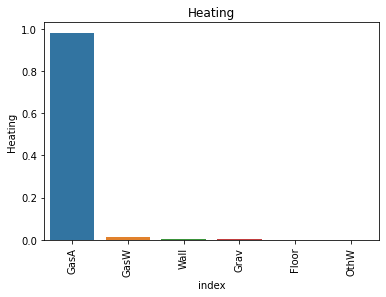

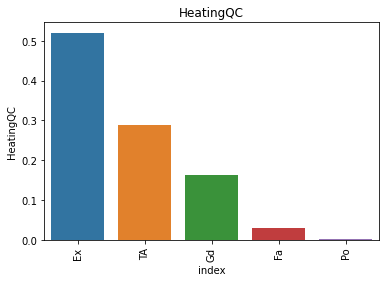

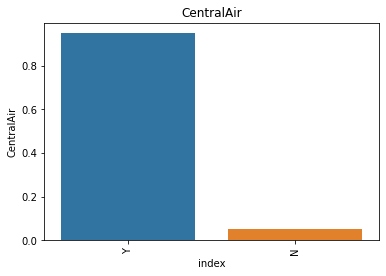

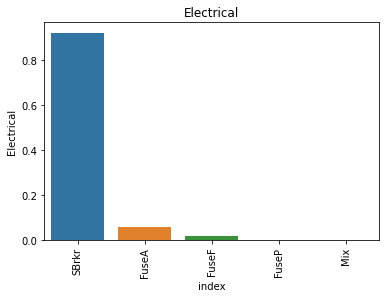

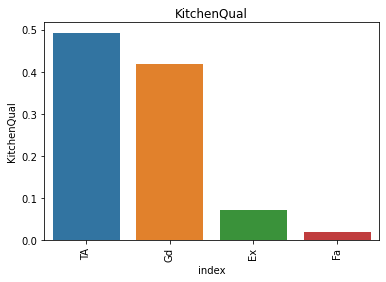

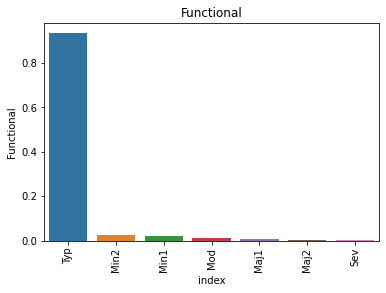

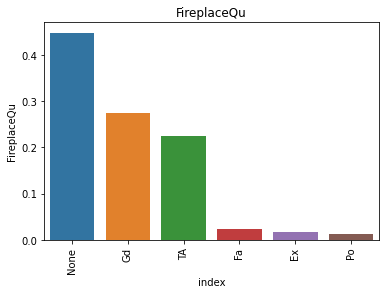

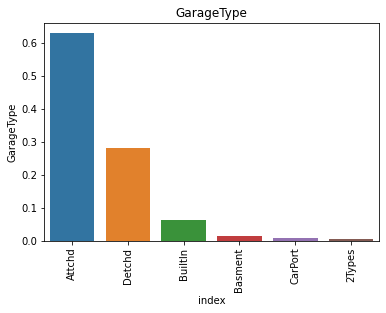

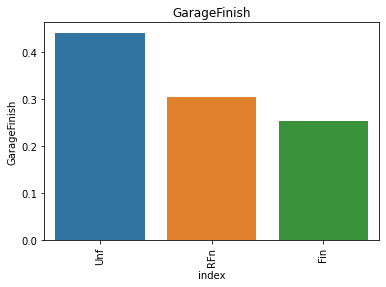

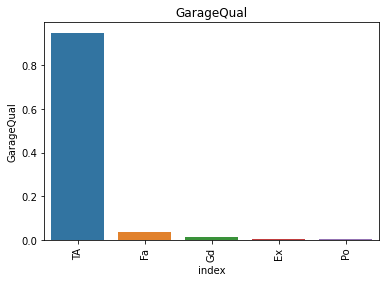

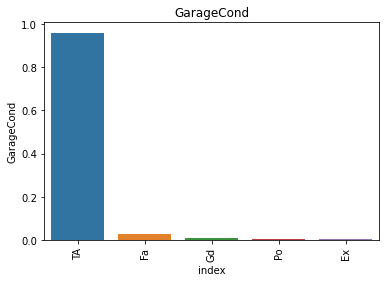

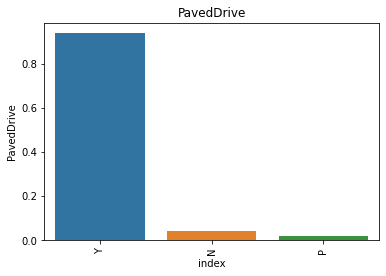

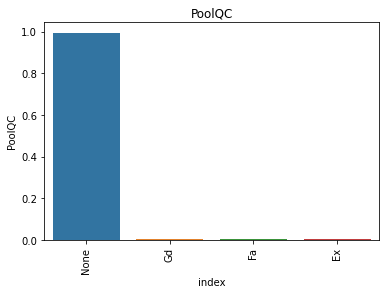

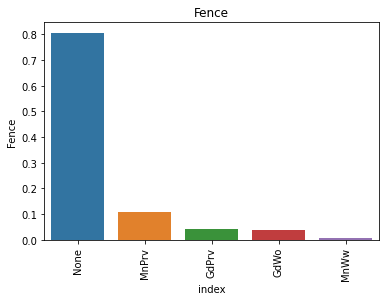

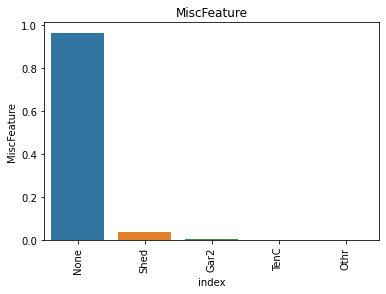

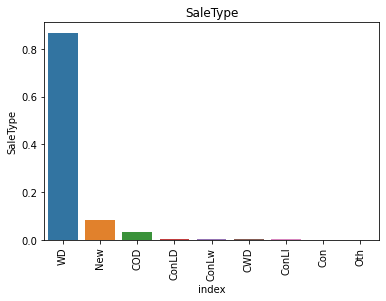

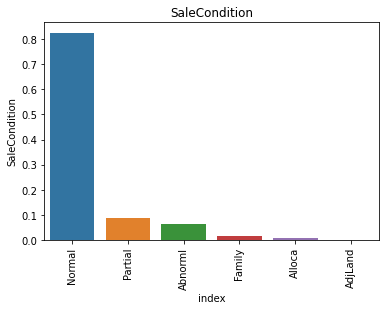

In [29]:
# Plot barplots of all categorical variables

for col in cat_cols:
    sns.barplot(data =house[col].value_counts(normalize=True).reset_index(), x='index', y=col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

- Bi-variate

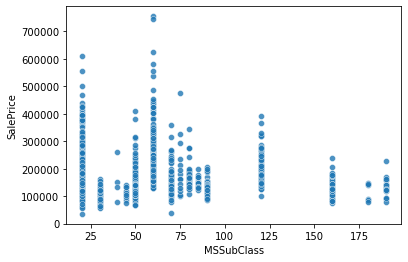

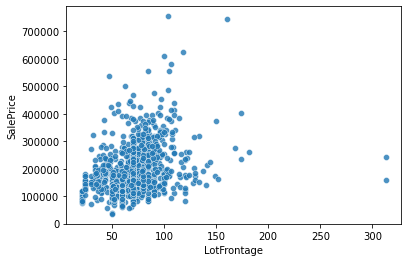

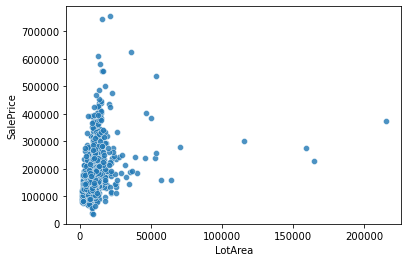

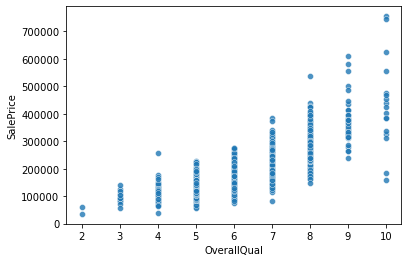

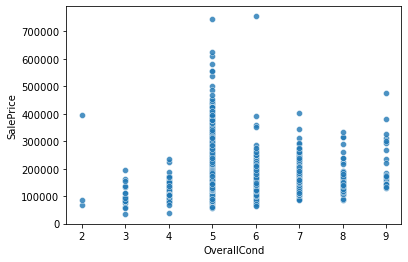

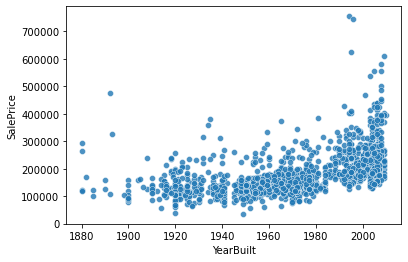

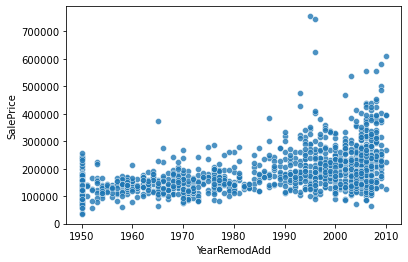

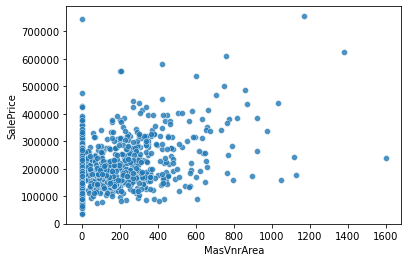

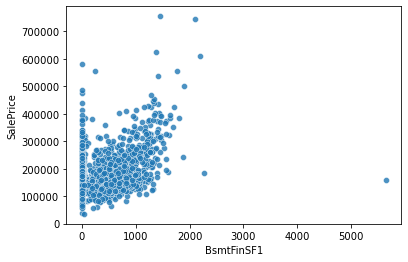

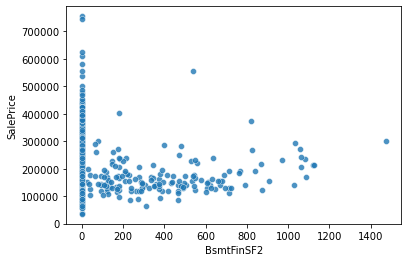

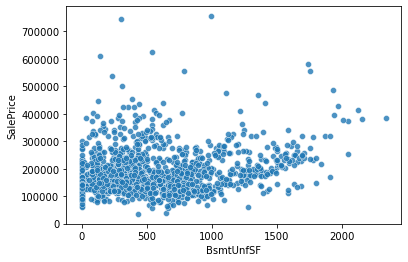

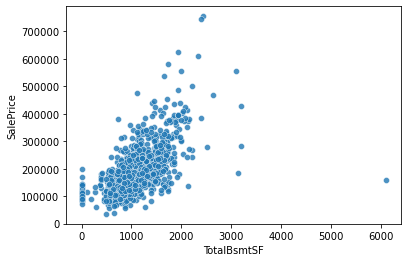

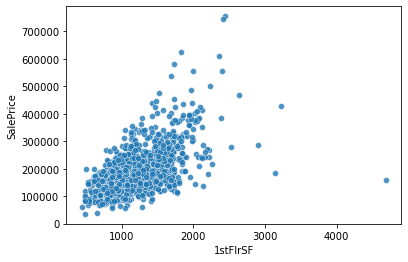

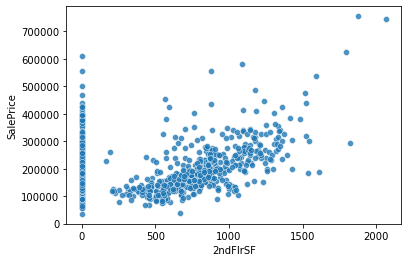

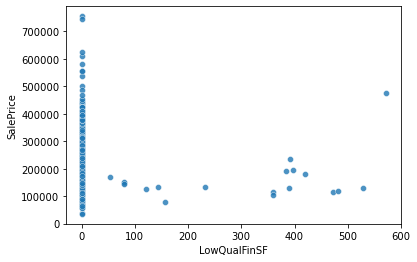

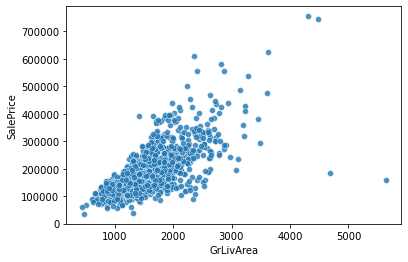

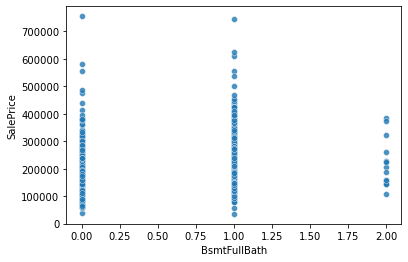

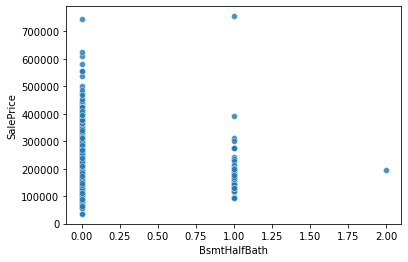

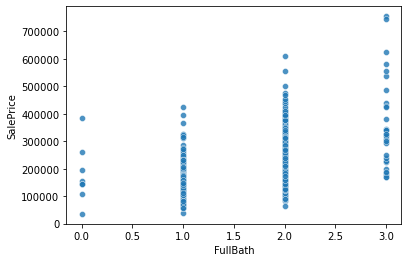

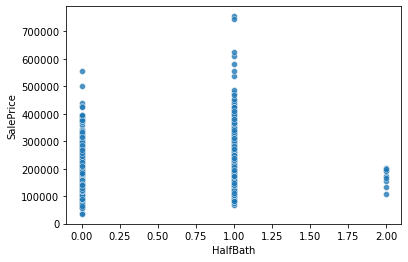

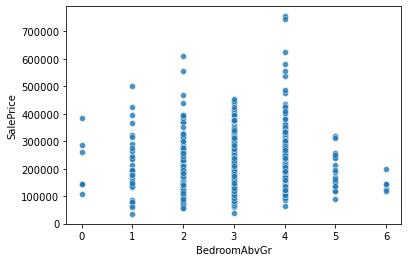

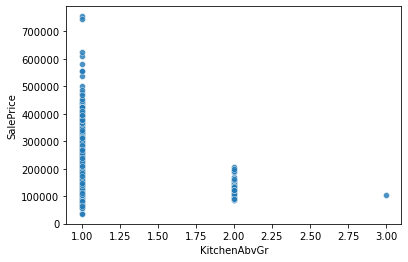

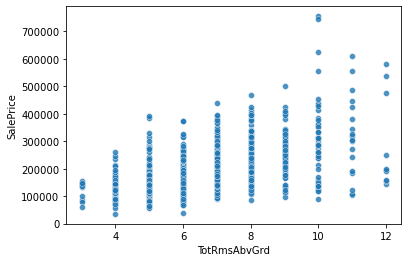

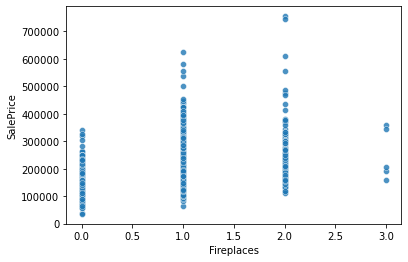

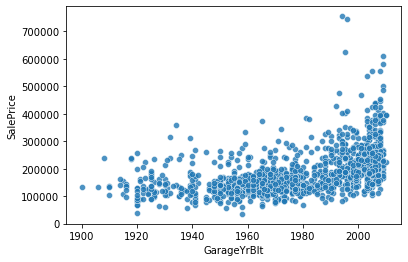

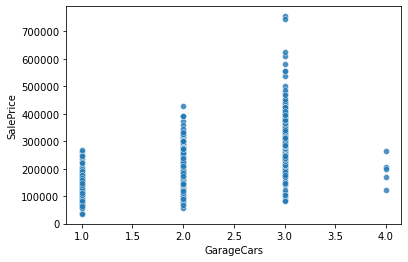

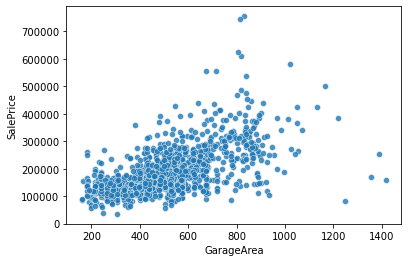

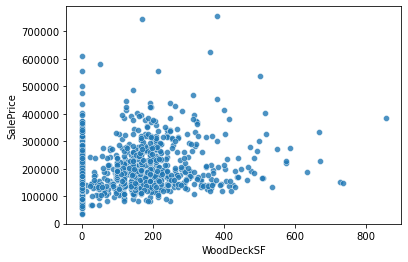

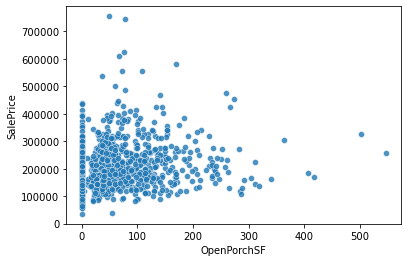

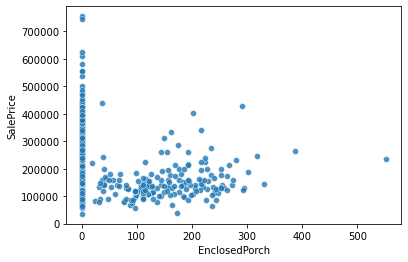

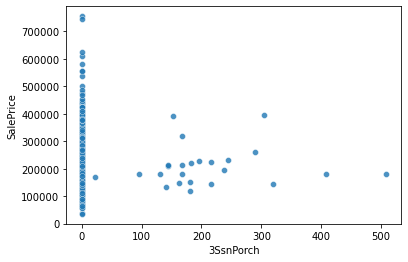

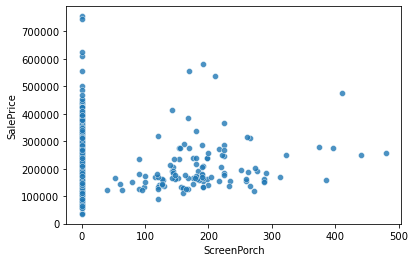

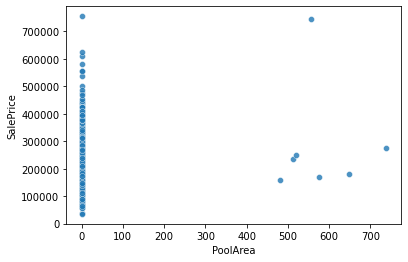

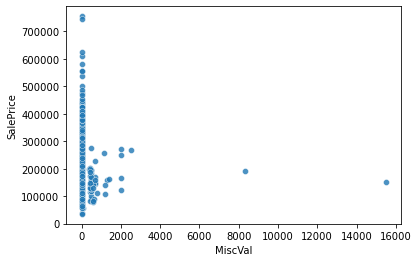

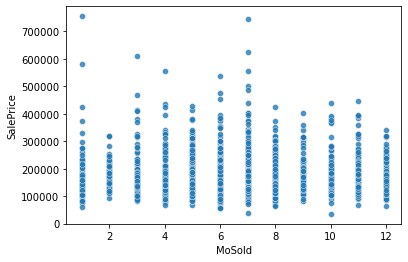

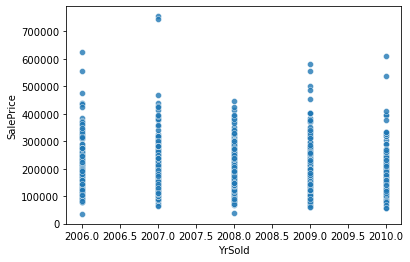

In [30]:
# Plot Scatter plots of all neumerical variables with target variable

for col in Numeric_cols.drop('SalePrice'):
    sns.scatterplot(x=house[col], y=house['SalePrice'], alpha=.8)
    plt.show()

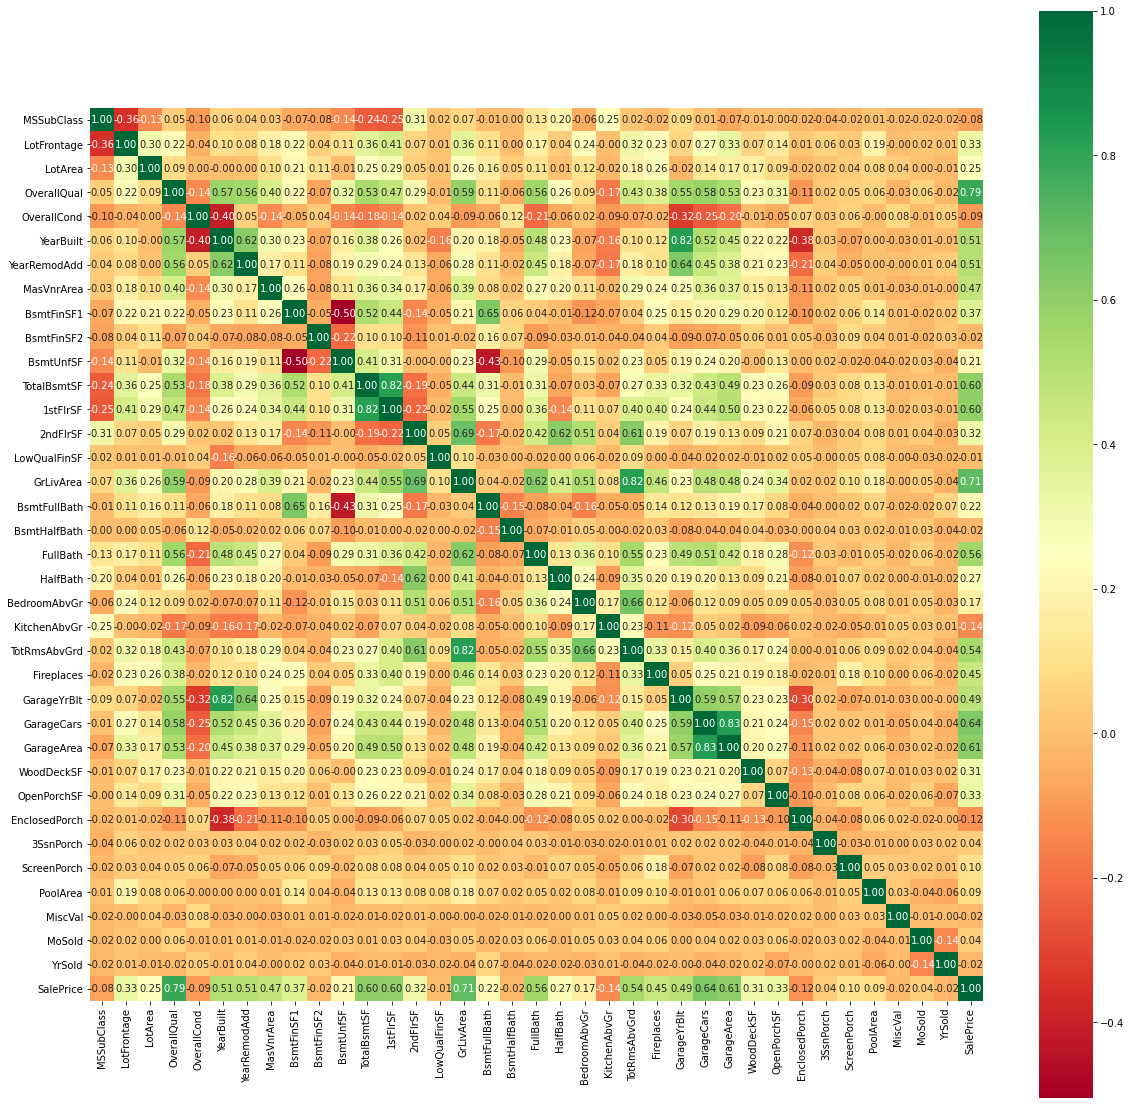

In [31]:
# Plot correlation heatmap to identify multi-collinearity between neumerical variables and relation with target variable
# There is high correlation between few variables. 
# Let's continue with all variables for model building and regularize with ridge and Lasso

plt.figure(figsize=(20,20))
sns.heatmap(house.corr(), cmap='RdYlGn', annot=True, square=True, fmt='.2f', annot_kws={'size':10})
plt.show()

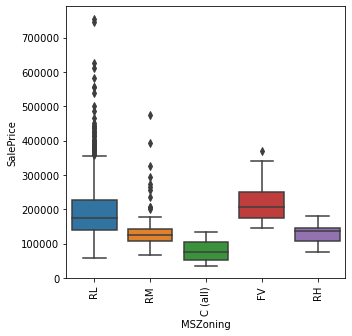

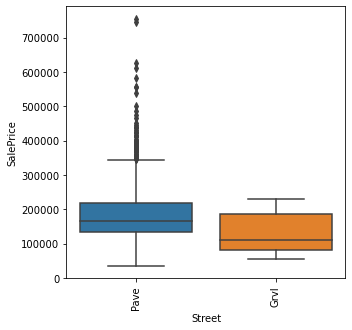

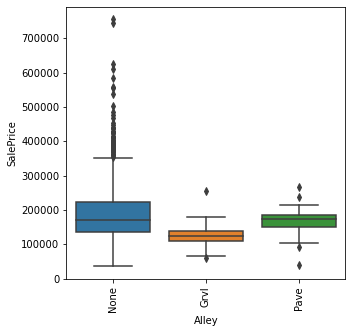

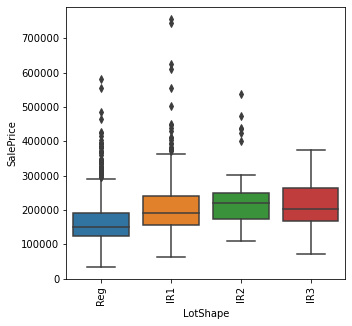

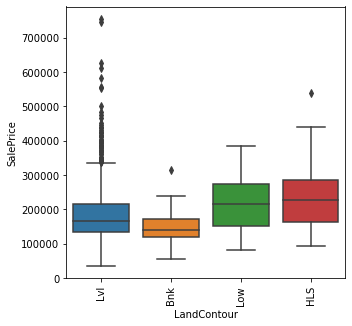

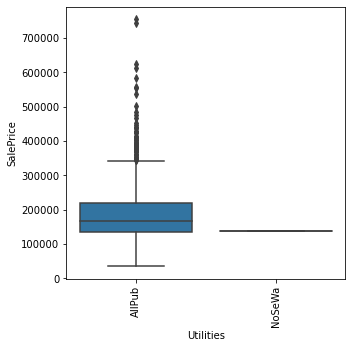

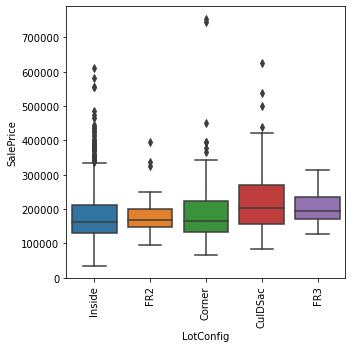

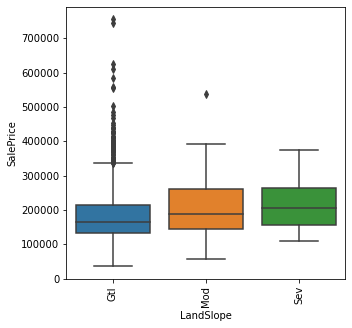

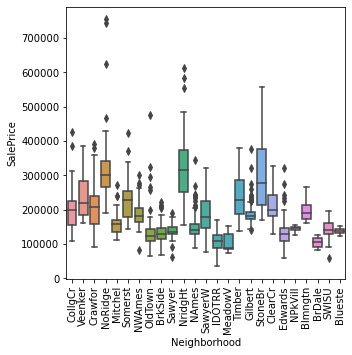

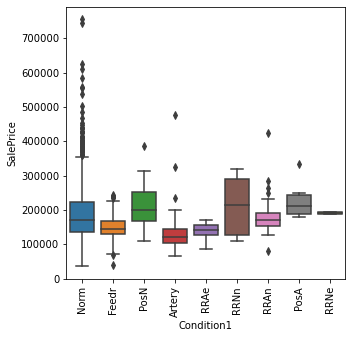

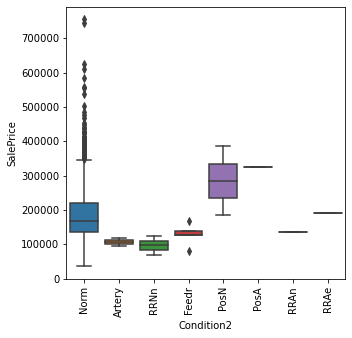

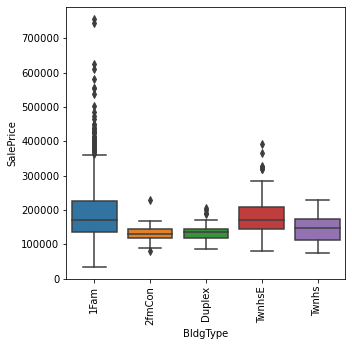

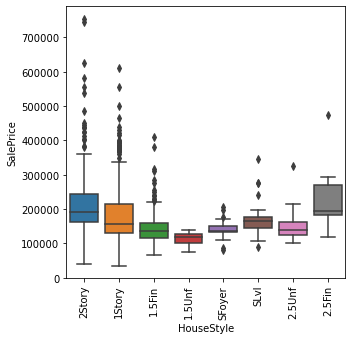

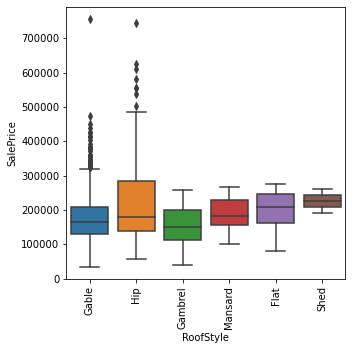

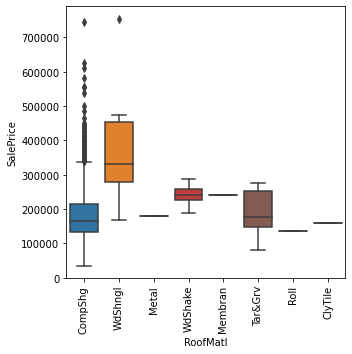

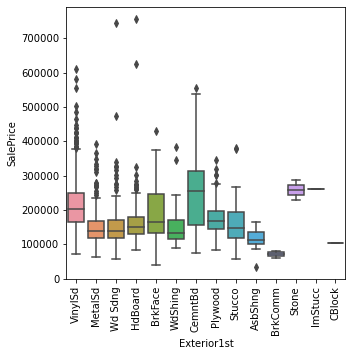

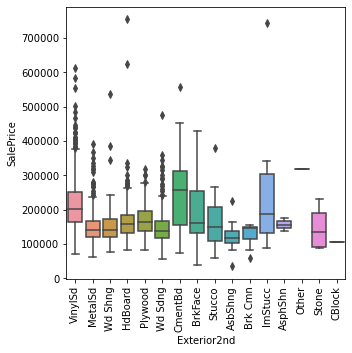

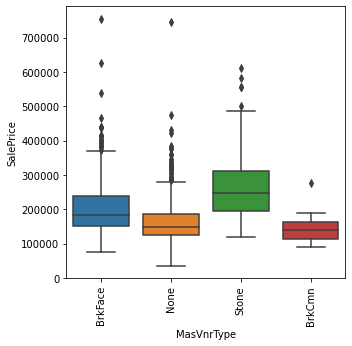

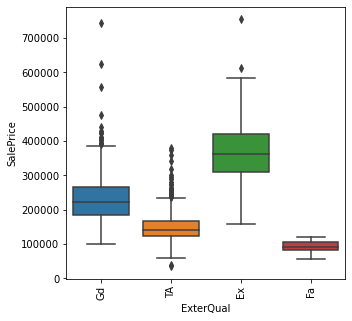

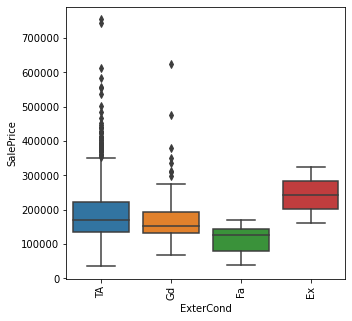

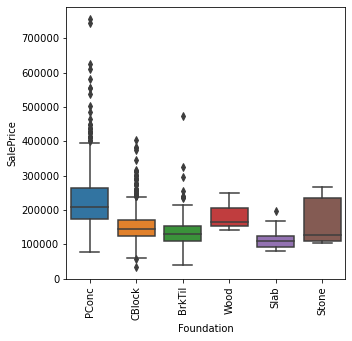

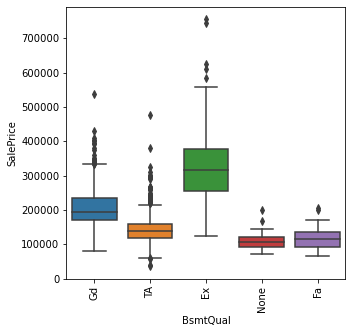

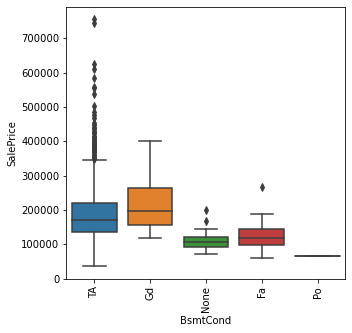

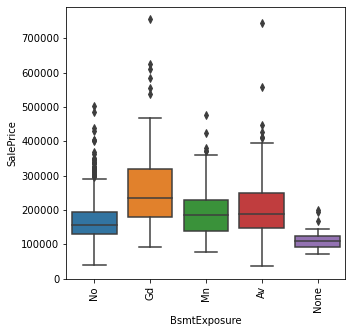

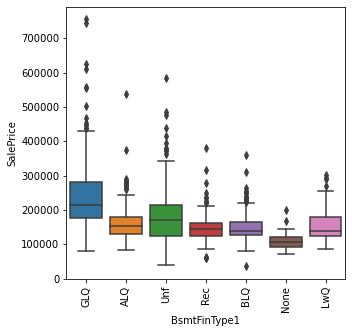

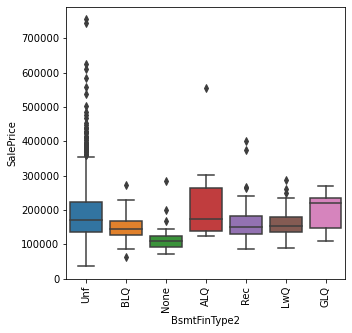

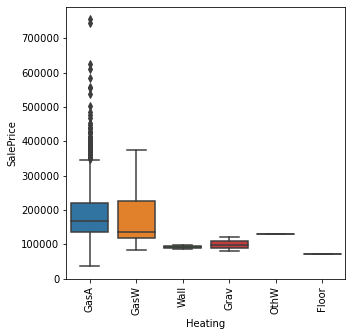

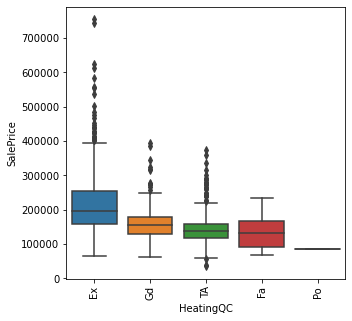

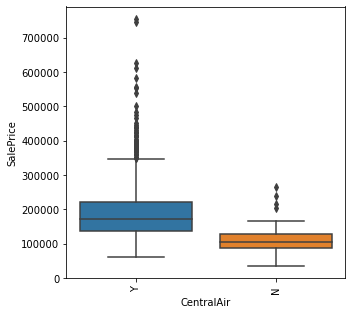

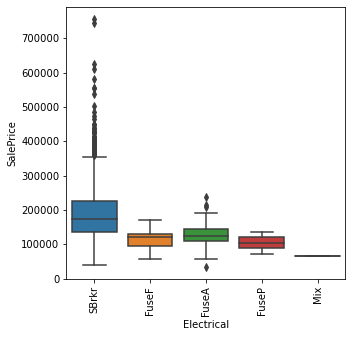

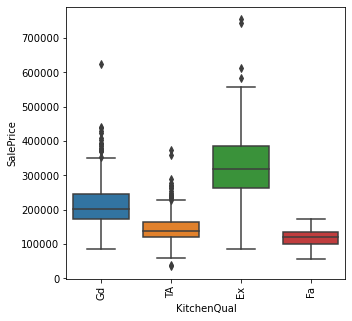

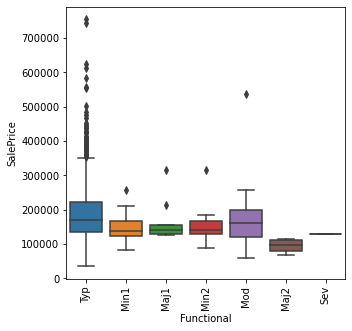

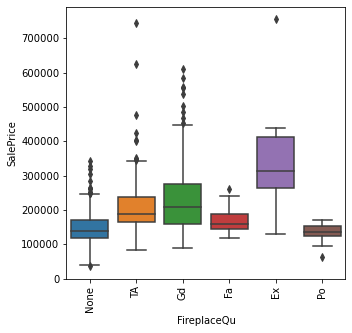

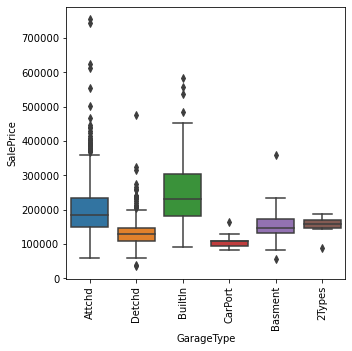

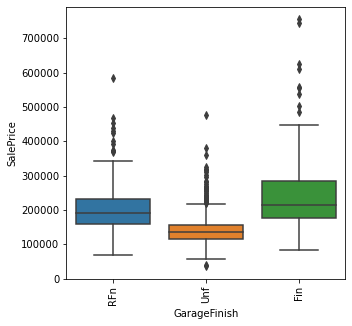

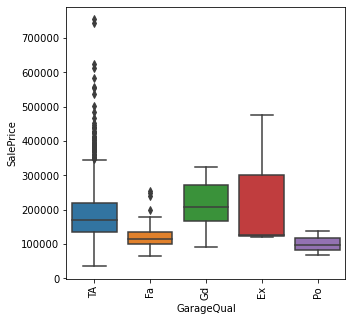

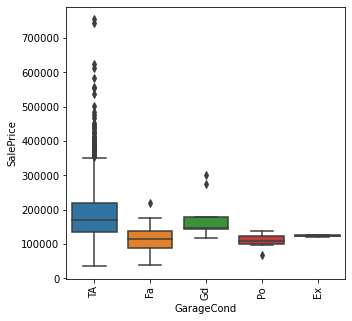

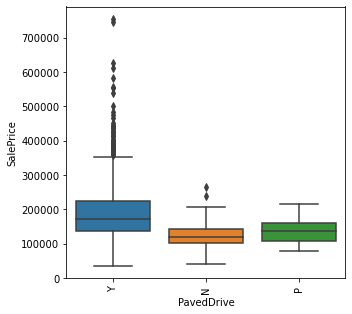

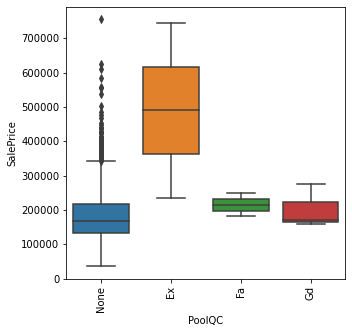

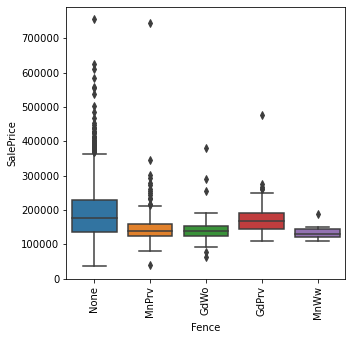

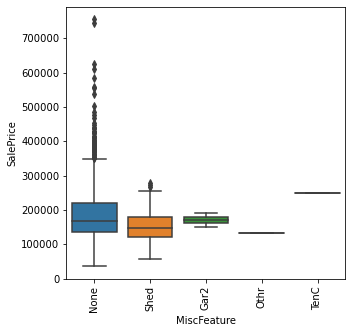

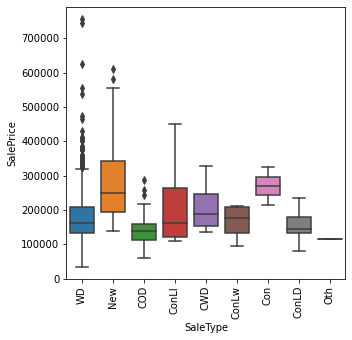

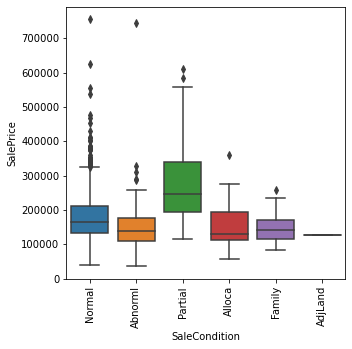

In [32]:
# Plot box plots of target variable wrt the categorical variables

for col in cat_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=house[col],y=house['SalePrice'])
    plt.xticks(rotation=90)
    plt.show()

### Data Preparation

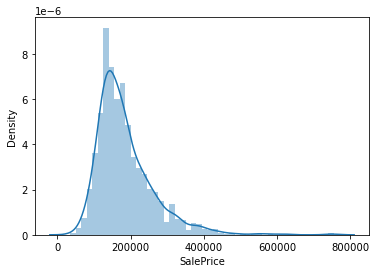

(1.9353698091209877, 6.77402839062597)

In [33]:
# Verify if the target variable has gaussian distribution
# The distribution is positivly skewed with high Kurtosis

sns.distplot(house['SalePrice'])
plt.show()
house['SalePrice'].skew(), house['SalePrice'].kurt()

(0.2903494085138682, 0.677373365653775)

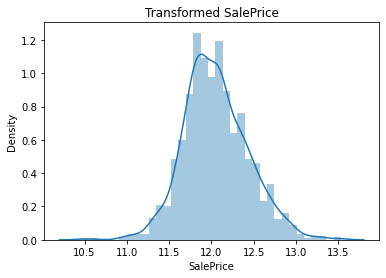

In [34]:
# Power transform the target variable by applying log
# The transformed distribution is decent gaussian with better skew and kurtosis

sns.distplot(np.log(house['SalePrice']))
plt.title("Transformed SalePrice")
np.log(house['SalePrice']).skew(), np.log(house['SalePrice']).kurt()

In [35]:
# Create transformed variable for target

house['TransformedPrice'] = np.log(house['SalePrice'])
house.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011


In [36]:
# Craete Dummy variales for all categorical columns

dummies_1 = pd.get_dummies(house[[x for x in cat_cols if x not in col_NA_None]],drop_first=True)
dummies_1.head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
# Craete Dummy variales for all categorical columns with None category
# and drop None category column as the other columns are more interpretable to business

dummies_2 = pd.get_dummies(house[col_NA_None])
dummies_2.head(2)

,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Alley_Grvl,Alley_None,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA
0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [38]:
dummies_2.drop(columns=[x+"_None" for x in col_NA_None], inplace=True)
dummies_2.head(2)

,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [39]:
dummies_2.shape

(1370, 42)

In [40]:
# Concat dummy variables to original data set

house = pd.concat([house,dummies_1,dummies_2],axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [41]:
# Drop original categorical columns which are dummyfied

house.drop(columns=cat_cols, inplace=True)
house.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,0,0,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011,0,0,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [42]:
# Convert Year columns into Age columns

from datetime import date

house['AgeBuilt'] = date.today().year - house['YearBuilt']
house['AgeRemodAdd'] = date.today().year - house['YearRemodAdd']
house['AgeGarageBlt'] = date.today().year - house['GarageYrBlt']
house['AgeSold'] = date.today().year - house['YrSold']

In [43]:
house.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], inplace=True)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,TransformedPrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Alley_Grvl,Alley_Pave,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500,12.247694,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,18,18,18.0,13
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500,12.109011,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,45,45,45.0,14
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500,12.317167,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,20,19,20.0,13
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000,11.849398,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,106,51,23.0,15
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000,12.429216,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,21,21,21.0,13


In [44]:
set(house.dtypes)

{dtype('uint8'), dtype('int64'), dtype('float64')}

### Model Building

- Linear Regression

In [45]:
# Importing sklearn libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [46]:
# Assign input vecor,X and target,y

X = house.drop(columns=['SalePrice','TransformedPrice'])
y = house['TransformedPrice']
X.shape, y.shape

((1370, 253), (1370,))

In [47]:
# Split input data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7, random_state=100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((958, 253), (958,), (412, 253), (412,))

In [48]:
# Scale contionuous variables to standard gaussian scale

scaler = StandardScaler()

In [49]:
# Identify the continuous variables in the input data set

num_vars = Numeric_cols
num_vars = num_vars.drop(['SalePrice','YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])
num_vars = num_vars.append(pd.Index(['AgeBuilt','AgeRemodAdd','AgeGarageBlt','AgeSold']))
X_train[num_vars].head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
1276,60,70.0,12936,6,6,0.0,593,0,130,723,735,660,0,1395,0,1,1,1,3,1,6,1,2,497,294,116,0,0,0,0,0,12,49,49,49.0,12
770,85,70.0,7252,5,5,0.0,685,0,173,858,858,0,0,858,1,0,1,0,2,1,5,0,2,576,120,0,0,0,0,0,0,4,39,39,38.0,12


In [50]:
# Scale the contionuous variables in both train and test sets

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train[num_vars].head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
1276,0.12138,-0.040533,0.169310,-0.128436,0.342110,-0.59265,0.319923,-0.304297,-0.990108,-0.780390,-1.147568,0.758406,-0.093631,-0.252503,-0.816049,3.939193,-1.070245,1.274917,0.183471,-0.192132,-0.336607,0.571032,0.196077,-0.008657,1.601768,1.097297,-0.357721,-0.109289,-0.282016,-0.063777,-0.085573,2.121929,0.009120,0.653747,0.215196,-0.884461
770,0.72765,-0.040533,-0.314858,-0.883293,-0.558279,-0.59265,0.520524,-0.304297,-0.894244,-0.479938,-0.831101,-0.786839,-0.093631,-1.331336,1.128665,-0.253859,-1.070245,-0.757313,-1.138070,-0.192132,-0.977700,-0.965622,0.196077,0.421799,0.211336,-0.721379,-0.357721,-0.109289,-0.282016,-0.063777,-0.085573,-0.857636,-0.332185,0.163654,-0.226858,-0.884461


In [51]:
X_test[num_vars].head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
1142,0.12138,0.266599,-0.083762,1.381277,-0.558279,1.294661,1.534433,-0.304297,-0.575439,0.873208,0.733224,2.401986,-0.093631,2.626395,1.128665,-0.253859,2.678548,-0.757313,1.505011,-0.192132,2.868858,0.571032,1.761429,3.015431,0.251291,1.536287,-0.357721,-0.109289,-0.282016,-0.063777,-0.085573,-0.857636,-1.151319,-1.061579,-1.151154,0.617868
763,0.12138,0.485978,-0.129334,1.381277,-0.558279,3.143116,1.562778,-0.304297,-1.081513,0.396937,0.223789,1.781546,-0.093631,1.696228,1.128665,-0.253859,0.804151,1.274917,0.183471,-0.192132,0.945579,0.571032,1.761429,1.947465,-0.747583,1.285435,-0.357721,-0.109289,2.808202,-0.063777,-0.085573,0.259701,-0.912405,-0.669504,-0.869847,-0.884461


In [52]:
# Initiate Linear regression object

lm = LinearRegression()

In [53]:
# Fit Linear regression

lm.fit(X_train, y_train)

LinearRegression()

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

In [55]:
# Calculate model key evaluation metrics for both train and test (un-seen) sets
# R-Square, RSS, MSE
# Save the metrics in list for comparision with other regressions

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9592804918394123
-610182351067819.4
5.349261374631389
4.05918611043348e+16
0.005583780140533809
98523934719259.22


- R2 score for train data is 95%
- R2 score for test data is negative
#### Model overfitted training data. Let's regualarize using Ridge and Lasso


### Regularization

- Ridge

In [56]:
# Inport Ridge, Lasso libraries

from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [57]:
# list of alphas to tune (Hyper parameter tuning)

params = { 'alpha' : [0.00001,0.00005,0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                       0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,
                      8.0,9.0,10.0,20,50,100,500,1000]}

In [58]:
# Applying lasso

lasso = Lasso()
# Cross validation
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Best alpha value from tuning

model_cv.best_params_

{'alpha': 0.001}

In [60]:
# Dispaly Grid Search cross validation results with different alphas

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.185315,0.038884,0.004907,0.005998,1e-05,{'alpha': 1e-05},-0.111879,-0.095455,-0.081657,-0.087234,-0.133414,-0.101928,0.018757,5,-0.050687,-0.053211,-0.055496,-0.052419,-0.053334,-0.053029,0.001554
1,0.111279,0.011795,0.003131,0.006262,5e-05,{'alpha': 5e-05},-0.108480,-0.092572,-0.078435,-0.084324,-0.137940,-0.100350,0.021339,4,-0.052163,-0.055140,-0.059050,-0.057038,-0.055306,-0.055739,0.002279
2,0.101066,0.010397,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.106995,-0.090681,-0.075299,-0.087250,-0.126182,-0.097282,0.017647,3,-0.054092,-0.057228,-0.063983,-0.063070,-0.057639,-0.059203,0.003749
3,0.019221,0.006593,0.003363,0.006726,0.001,{'alpha': 0.001},-0.091120,-0.090010,-0.075123,-0.083141,-0.100748,-0.088028,0.008552,1,-0.069316,-0.068437,-0.079030,-0.077947,-0.074810,-0.073908,0.004345
4,0.013040,0.011388,0.003453,0.006817,0.01,{'alpha': 0.01},-0.100452,-0.093898,-0.090438,-0.092743,-0.108766,-0.097259,0.006646,2,-0.093126,-0.085531,-0.098455,-0.096321,-0.092858,-0.093258,0.004388


In [61]:
cv_results.shape

(30, 21)

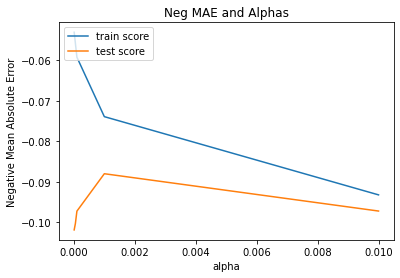

In [62]:
# plot mean test and train scores with alpha
# From plot, 0.001 seems to be optimal value

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'][:5], cv_results['mean_train_score'][:5])
plt.plot(cv_results['param_alpha'][:5], cv_results['mean_test_score'][:5])
plt.xlabel('alpha')
plt.ylabel("Negative Mean Absolute Error")

plt.title("Neg MAE and Alphas")
plt.legend(['train score','test score'], loc='upper left')
plt.show()

In [63]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients
alpha = 0.001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.54765182e-02  4.85239807e-03  3.86708054e-02  4.82922707e-02
  3.75608603e-02  1.27009560e-03  3.19983868e-02  8.70210282e-03
  3.67986140e-03  3.97236236e-02  3.36931300e-02  4.83808009e-02
 -6.15622277e-03  6.73485167e-02  1.05649090e-02  1.04082776e-03
  1.21505266e-02  8.24525820e-03 -4.83251464e-03 -1.14016728e-02
  1.21345268e-02  9.48814719e-04  1.11453826e-02  2.68925815e-02
  1.22364622e-02  7.93743127e-03  7.51093073e-03  3.74742182e-03
  1.25780855e-02  1.11662682e-01  3.08939016e-02  5.14893467e-04
  4.14046104e-01  3.63899145e-01  3.74806702e-01  3.32818878e-01
  2.05693502e-01  1.77920280e-02 -1.08683437e-02 -9.49148722e-03
 -3.01408905e-02 -9.32270531e-02 -2.45452374e-02 -2.42545421e-01
  2.19726008e-02 -4.11439418e-02 -4.00831131e-02 -1.08803500e-02
  1.97843891e-02 -1.90719773e-01 -6.24047534e-02 -1.74585991e-02
  6.91801767e-02  7.00271905e-02  4.19399771e-03  1.55701611e-01
 -7.20404343e-02  2.22115856e-03  5.53137231e-02 -1.53378672e-01
 -1.77547821e-02 -2.71543

In [64]:
# Calculate model key evaluation metrics for both train and test (un-seen) sets
# R-Square, RSS, MSE
# Save the metrics in list for comparision with other regressions

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9592739822532248
0.8387333956890863
5.350116529311066
10.728123472435117
0.005584672786337229
0.026039134641832808


_

- Lasso

In [65]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [67]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [68]:
lasso.coef_

array([-0.0239582 , -0.00848416,  0.02057016,  0.08557491,  0.0418537 ,
        0.00207531, -0.        ,  0.00603681,  0.00246787,  0.0012212 ,
        0.        ,  0.        , -0.00044235,  0.09624289,  0.02893785,
        0.00108521,  0.021025  ,  0.00811281,  0.00275714, -0.01521094,
        0.02218138,  0.01929398,  0.04315355,  0.        ,  0.01592607,
        0.00578735,  0.0102587 ,  0.0003454 ,  0.01678034, -0.01378038,
       -0.        , -0.        ,  0.        , -0.        ,  0.02058111,
       -0.04264085,  0.        ,  0.        , -0.02181392, -0.00748848,
        0.        ,  0.        ,  0.00077381, -0.        ,  0.03692723,
       -0.00016143, -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.0349648 ,  0.01692391,  0.        ,
        0.09518217, -0.04688689, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.01237575,
        0.085292  , -0.        , -0.        , -0.        , -0.  

In [69]:
# Calculate model key evaluation metrics for both train and test (un-seen) sets
# R-Square, RSS, MSE
# Save the metrics in list for comparision with other regressions

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.909818107048289
0.8704822107100492
11.847061481077766
8.616060599258208
0.012366452485467397
0.020912768444801475


In [70]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.592805e-01,0.959274,0.909818
1,R2 Score (Test),-6.101824e+14,0.838733,0.870482
2,RSS (Train),5.349261e+00,5.350117,11.847061
3,RSS (Test),4.059186e+16,10.728123,8.616061
4,MSE (Train),7.472470e-02,0.074731,0.111205
5,MSE (Test),9.925922e+06,0.161366,0.144612


- Coefficients

In [71]:
# Store co-effcients from all regressions to compare

coeff = pd.DataFrame(index=X.columns)
coeff.rows = X.columns

In [72]:
coeff['Linear'] = lm.coef_
coeff['Ridge'] = ridge.coef_
coeff['Lasso'] = lasso.coef_

In [73]:
# Display top 5 variables from Ridge (positively proportional)

coeff.sort_values('Ridge', ascending=False).head()

,Linear,Ridge,Lasso
RoofMatl_WdShngl,2.557401e+07,2.176239,0.0
RoofMatl_CompShg,2.557401e+07,2.150887,0.0
RoofMatl_Roll,2.557401e+07,2.138659,0.0
RoofMatl_WdShake,2.557401e+07,2.126166,0.0
RoofMatl_Membran,-6.653037e+07,1.581522,0.0


In [74]:
# Display top 5 negativly proportional variables from Ridge

coeff.sort_values('Ridge').head()

,Linear,Ridge,Lasso
PoolQC_Gd,7.315354e+07,-1.947199,-0.00000
PoolQC_Fa,6.423238e+07,-1.783814,0.00000
PoolQC_Ex,5.075151e+07,-1.422263,0.00000
RoofStyle_Gable,-9.210437e+07,-0.968650,-0.01393
RoofStyle_Hip,-9.210437e+07,-0.967413,-0.00000


In [75]:
# Display top 5 variables from Lasso (positively proportional)

coeff.sort_values('Lasso', ascending=False).head(10)

,Linear,Ridge,Lasso
GrLivArea,2.547362e+09,0.067349,0.096243
Neighborhood_Crawfor,1.551680e-01,0.155702,0.095182
Neighborhood_StoneBr,1.761860e-01,0.176787,0.091836
OverallQual,4.809456e-02,0.048292,0.085575
Neighborhood_NridgHt,7.227016e-02,0.073556,0.085292
SaleType_New,4.873415e-01,0.486973,0.060478
Condition1_Norm,7.846304e-02,0.078292,0.050292
Functional_Typ,5.809295e-02,0.057672,0.046849
GarageCars,1.074106e-02,0.011145,0.043154
CentralAir_Y,8.795194e-02,0.087815,0.042525


In [76]:
# Display top 5 negativly proportional variables from Lasso

coeff.sort_values('Lasso').head()

,Linear,Ridge,Lasso
BsmtFinType1_Unf,-4.743758e+08,-0.040319,-0.050299
Neighborhood_Edwards,-7.246096e-02,-0.072040,-0.046887
AgeBuilt,-6.237749e-02,-0.061887,-0.044765
BldgType_Twnhs,-2.223985e-02,-0.022970,-0.043220
MSZoning_RM,3.319690e-01,0.332819,-0.042641


#### 1. Which variables are significant in predicting the price of a house?

Answer:
From Lasso model, below are the top 10 significant variables in predicting the house prices.
- GrLivArea
- Neighborhood_Crawfor
- Neighborhood_StoneBr
- OverallQual
- Neighborhood_NridgHt
- SaleType_New
- Condition1_Norm	
- Functional_Typ
- GarageCars
- CentralAir_Y

#### 2. How well those variables describe the price of a house.

Answer: The Lasso regression gives 0.9 R-square score for train data and 0.87 on un-seen test data.
- So, the selected variables describe `87 to 90 %` variance about the house price

#### ********** End of Problem Statement - Part I **********

_______________________________

### Problem Statement - Part II

Question 1

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- Re-run Ridge and Lasso Regularizations with doubling the alpha

Ridge

In [77]:
#Fitting Ridge model for alpha = 0.002 and printing coefficients
alpha_2 = 0.001*2
ridge_2 = Ridge(alpha=alpha_2)

ridge_2.fit(X_train, y_train)
print(ridge_2.coef_)

[-2.55095521e-02  4.44825654e-03  3.86454098e-02  4.84825017e-02
  3.74580220e-02  1.32212077e-03  3.13623512e-02  8.61692089e-03
  3.52912875e-03  3.88907738e-02  3.38299680e-02  4.81110148e-02
 -6.26961708e-03  6.72151248e-02  1.07012167e-02  1.03657595e-03
  1.23899741e-02  8.33144030e-03 -4.73959771e-03 -1.15157044e-02
  1.23220105e-02  8.55798635e-04  1.15316710e-02  2.65648976e-02
  1.23057933e-02  7.95611654e-03  7.50712988e-03  3.73503792e-03
  1.26071715e-02  1.09024824e-01  3.01435632e-02  5.45306448e-04
  4.14503114e-01  3.64967522e-01  3.75540766e-01  3.33556599e-01
  2.06753213e-01  1.77345047e-02 -1.17542319e-02 -9.49861287e-03
 -2.88325408e-02 -9.21036024e-02 -2.31800866e-02 -2.43265309e-01
  2.22353486e-02 -4.12866323e-02 -4.11114120e-02 -1.08325009e-02
  2.02320582e-02 -1.89777339e-01 -6.31166833e-02 -1.73286238e-02
  6.93377912e-02  7.01868410e-02  4.60497249e-03  1.56205118e-01
 -7.16414734e-02  2.44622426e-03  5.54570883e-02 -1.53339018e-01
 -1.78521260e-02 -2.69495

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_2.predict(X_train)
y_pred_test = ridge_2.predict(X_test)

metric2_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2_2.append(mse_test_lr**0.5)

0.9592555860654722
0.8397592442483878
5.352533209203097
10.659879770924615
0.005587195416704694
0.02587349458962285


Lasso

In [79]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients

alpha_2 =0.001*2

lasso_2 = Lasso(alpha=alpha_2)
        
lasso_2.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [80]:
lasso_2.coef_

array([-2.38436064e-02, -5.68744312e-03,  2.09281679e-02,  9.26353714e-02,
        4.42596480e-02,  1.66084638e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.29455654e-02,  1.35878832e-03,  0.00000000e+00,
       -0.00000000e+00,  9.24792978e-02,  2.80988659e-02,  0.00000000e+00,
        1.72715923e-02,  4.88375450e-03,  0.00000000e+00, -1.49576474e-02,
        2.06695434e-02,  2.06249906e-02,  4.38938601e-02,  0.00000000e+00,
        1.50659734e-02,  6.06185137e-03,  8.16204731e-03,  0.00000000e+00,
        1.74871968e-02, -1.59038584e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.70410714e-03, -5.23243608e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -8.43278914e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.11425212e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_2.predict(X_train)
y_pred_test = lasso_2.predict(X_test)

metric3_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3_2.append(mse_test_lr**0.5)

0.8954261649898109
0.8624635829539009
13.737709557074545
9.14949297984956
0.01433998909924274
0.022207507232644565


In [82]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric_2 = pd.Series(metric2_2, name = 'Ridge Regression')
ls_metric_2 = pd.Series(metric3_2, name = 'Lasso Regression')

final_metric_2 = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric_2

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.592805e-01,0.959274,0.909818
1,R2 Score (Test),-6.101824e+14,0.838733,0.870482
2,RSS (Train),5.349261e+00,5.350117,11.847061
3,RSS (Test),4.059186e+16,10.728123,8.616061
4,MSE (Train),7.472470e-02,0.074731,0.111205
5,MSE (Test),9.925922e+06,0.161366,0.144612


In [83]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.592805e-01,0.959274,0.909818
1,R2 Score (Test),-6.101824e+14,0.838733,0.870482
2,RSS (Train),5.349261e+00,5.350117,11.847061
3,RSS (Test),4.059186e+16,10.728123,8.616061
4,MSE (Train),7.472470e-02,0.074731,0.111205
5,MSE (Test),9.925922e+06,0.161366,0.144612


In [84]:
coeff_2 = pd.DataFrame(index=X.columns)
coeff_2.rows = X.columns

In [85]:
coeff_2['Linear'] = lm.coef_
coeff_2['Ridge'] = ridge_2.coef_
coeff_2['Lasso'] = lasso_2.coef_

In [86]:
coeff.sort_values('Ridge').head(), coeff_2.sort_values('Ridge').head()

(                       Linear     Ridge    Lasso
 PoolQC_Gd        7.315354e+07 -1.947199 -0.00000
 PoolQC_Fa        6.423238e+07 -1.783814  0.00000
 PoolQC_Ex        5.075151e+07 -1.422263  0.00000
 RoofStyle_Gable -9.210437e+07 -0.968650 -0.01393
 RoofStyle_Hip   -9.210437e+07 -0.967413 -0.00000,
                        Linear     Ridge     Lasso
 PoolQC_Gd        7.315354e+07 -1.921141 -0.000000
 PoolQC_Fa        6.423238e+07 -1.738401  0.000000
 PoolQC_Ex        5.075151e+07 -1.379335  0.000000
 RoofStyle_Gable -9.210437e+07 -0.951732 -0.009658
 RoofStyle_Hip   -9.210437e+07 -0.950357  0.000000)

In [87]:
coeff.sort_values('Ridge', ascending=False).head(), coeff_2.sort_values('Ridge', ascending=False).head()

(                        Linear     Ridge  Lasso
 RoofMatl_WdShngl  2.557401e+07  2.176239    0.0
 RoofMatl_CompShg  2.557401e+07  2.150887    0.0
 RoofMatl_Roll     2.557401e+07  2.138659    0.0
 RoofMatl_WdShake  2.557401e+07  2.126166    0.0
 RoofMatl_Membran -6.653037e+07  1.581522    0.0,
                         Linear     Ridge  Lasso
 RoofMatl_WdShngl  2.557401e+07  2.130967    0.0
 RoofMatl_CompShg  2.557401e+07  2.105557    0.0
 RoofMatl_Roll     2.557401e+07  2.092010    0.0
 RoofMatl_WdShake  2.557401e+07  2.078447   -0.0
 RoofMatl_Membran -6.653037e+07  1.549417    0.0)

In [88]:
coeff.sort_values('Lasso').head(), coeff_2.sort_values('Lasso').head()

(                            Linear     Ridge     Lasso
 BsmtFinType1_Unf     -4.743758e+08 -0.040319 -0.050299
 Neighborhood_Edwards -7.246096e-02 -0.072040 -0.046887
 AgeBuilt             -6.237749e-02 -0.061887 -0.044765
 BldgType_Twnhs       -2.223985e-02 -0.022970 -0.043220
 MSZoning_RM           3.319690e-01  0.332819 -0.042641,
                             Linear     Ridge     Lasso
 AgeBuilt             -6.237749e-02 -0.061418 -0.053792
 MSZoning_RM           3.319690e-01  0.333557 -0.052324
 BsmtFinType1_Unf     -4.743758e+08 -0.039696 -0.042915
 Neighborhood_Edwards -7.246096e-02 -0.071641 -0.036197
 MSSubClass           -2.544638e-02 -0.025510 -0.023844)

In [89]:
coeff.sort_values('Lasso', ascending=False).head(), coeff_2.sort_values('Lasso', ascending=False).head()

(                            Linear     Ridge     Lasso
 GrLivArea             2.547362e+09  0.067349  0.096243
 Neighborhood_Crawfor  1.551680e-01  0.155702  0.095182
 Neighborhood_StoneBr  1.761860e-01  0.176787  0.091836
 OverallQual           4.809456e-02  0.048292  0.085575
 Neighborhood_NridgHt  7.227016e-02  0.073556  0.085292,
                             Linear     Ridge     Lasso
 OverallQual           4.809456e-02  0.048483  0.092635
 GrLivArea             2.547362e+09  0.067215  0.092479
 Neighborhood_Crawfor  1.551680e-01  0.156205  0.051344
 OverallCond           3.767057e-02  0.037458  0.044260
 Neighborhood_NridgHt  7.227016e-02  0.074787  0.044094)

_

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [90]:
X_train_new = X_train.drop(columns=['GrLivArea','Neighborhood_Crawfor','Neighborhood_StoneBr',
                                    'OverallQual','Neighborhood_NridgHt'])
X_test_new = X_test.drop(columns=['GrLivArea','Neighborhood_Crawfor','Neighborhood_StoneBr',
                                    'OverallQual','Neighborhood_NridgHt'])

In [91]:
X_train_new.shape, X_test_new.shape, X_train.shape, X_test.shape

((958, 248), (412, 248), (958, 253), (412, 253))

In [92]:
lasso_new = Lasso()

# cross validation
model_cv_new = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_train_new, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Printing the best hyperparameter alpha
print(model_cv_new.best_params_)

{'alpha': 0.001}


In [94]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients

alpha =0.001

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [95]:
lasso_new.coef_

array([-0.01541684, -0.00863666,  0.01808947,  0.04972208,  0.00767781,
       -0.        ,  0.00820895,  0.00694896,  0.01310943,  0.08464692,
        0.08792093,  0.00590478,  0.02478193, -0.        ,  0.01956792,
        0.00547938, -0.        , -0.02227839,  0.02840492,  0.02690641,
        0.04928289,  0.        ,  0.01411814,  0.00431649,  0.01514676,
        0.        ,  0.01991334, -0.01574785,  0.        ,  0.00260284,
        0.01196559,  0.        ,  0.02338504, -0.05475223,  0.00989029,
        0.        , -0.04525525, -0.00715286,  0.        ,  0.        ,
        0.        , -0.        ,  0.0320753 , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.01519054,  0.        , -0.        , -0.09153467, -0.00521716,
       -0.00830497, -0.04366877, -0.01703062, -0.01672305, -0.        ,
       -0.        ,  0.00339863, -0.        , -0.        , -0.01235514,
       -0.00367768,  0.02174766, -0.        ,  0.        , -0.01

In [96]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

metric3_new = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3_new.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3_new.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3_new.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3_new.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3_new.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3_new.append(mse_test_lr**0.5)

0.8941177989037639
0.8477024639714967
13.909587668675677
10.13146384549282
0.014519402576905717
0.024590931663817525


In [97]:
coeff_new = pd.DataFrame(index=X_train_new.columns)
coeff_new.rows = X_train_new.columns
coeff_new['Lasso'] = lasso_new.coef_

In [98]:
coeff_new.sort_values('Lasso', ascending=False).head(5)

,Lasso
2ndFlrSF,0.087921
1stFlrSF,0.084647
BsmtQual_Ex,0.080476
Functional_Typ,0.063223
OverallCond,0.049722
